In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from IPython.display import display
import geopandas as gpd
from pywaffle import Waffle

# Exploration et visualisation des données de l'association Merterre pour le projet Zero Dechet Sauvage

Cette exploration des données a vocation à permettre de mieux apprehender et comprendre les données concernant les dechets issus de ramassages aggrégées et mises à dispositon en open data par l'association Merterre afin de concevoir un dashboard destiné aux collectivités (villes, regions, départements et structure de gestion de milieux naturels)

## Import des librairies et données

In [2]:
PATH = "~/Documents/D4G/Saison12/MERTERRE/MERTERREGITHUB/12_zero_dechet_sauvage/Exploration_visualisation/data/"

# nombre maximum de colonnes à afficher = 1500
pd.set_option('display.max_columns', 1500)

# import données structures et niveaux de caracterisation et fichier geojson france
df_niveaux_dechets = pd.read_excel(PATH+"Déchets-Niveaux2-3.xlsx")
df_structures = pd.read_excel(PATH+"export_structures_29022024.xlsx")
gdf = gpd.read_file(PATH+"a-com2022.json")

# import du fichier excel des données nettoyées par le sript python "cleaning.py" dans un dataframe et visualisation des premieres lignes
df_enriched_bdd_zds = pd.read_excel(PATH+"data_zds_enriched.xlsx")
df_enriched_bdd_zds.head()

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
0         12    France  Provence-Alpes-Côte d'Azur       13.0   
1         14    France  Provence-Alpes-Côte d'Azur       13.0   
2         16    France  Provence-Alpes-Côte d'Azur       13.0   
3         17    France  Provence-Alpes-Côte d'Azur       13.0   
4         21    France                   Occitanie       34.0   

           LIEU_VILLE  LIEU_CODE_POSTAL  \
0           Marseille           13008.0   
1           Marseille           13008.0   
2              Cassis           13260.0   
3           Marseille           13015.0   
4  Causse-de-la-Selle           34380.0   

                          LIEU_COORD_GPS  LIEU_COORD_GPS_X  LIEU_COORD_GPS_Y  \
0  ["5.3416741728752","43.213786286934"]          5.341674         43.213786   
1  ["5.3429503182801","43.213941067785"]          5.342950         43.213941   
2  ["5.5392828683314","43.226082263728"]          5.539283         43.226082   
3               ["5.363345","43.353322"]          5.363345         43.353322   
4  ["3.6599318889266","43.795834831668"]          3.659932         43.795835   

                                            NOM_ZONE  SPOT_A1S  SPOT_ID  \
0                               Anse de la Maronaise         1      1.0   
1                               Anse de la Maronaise         1      1.0   
2  Vallat dres Brayes et bords des routes des ale...         0      NaN   
3                           La cascade des Aygalades         0      NaN   
4  Gorges de l'Hérault du Barrage de St MArtin de...         0      NaN   

                                           TYPE_LIEU  \
0  Littoral (terrestre)/Plage (sable, galets, gra...   
1  Littoral (terrestre)/Espace naturel en arrière...   
2  Zone naturelle ou rurale (hors littoral et mon...   
3           Cours d'eau/Berge naturelle (hors plage)   
4           Cours d'eau/Berge naturelle (hors plage)   

                                         TYPE_MILIEU  \
0                               Littoral (terrestre)   
1                               Littoral (terrestre)   
2  Zone naturelle ou rurale (hors littoral et mon...   
3                                        Cours d'eau   
4                                        Cours d'eau   

                                          TYPE_LIEU2  \
0                  Plage (sable, galets, gravillons)   
1  Espace naturel en arrière plage/côte (calanque...   
2                                        Multi-lieux   
3                       Berge naturelle (hors plage)   
4                       Berge naturelle (hors plage)   

                            TYPE_DECHET  LONGUEUR_LINEAIRE       SURFACE  \
0                                Echoué             2500.0  5.855528e+04   
1            Présent au sol (abandonné)             2770.0  1.522318e+05   
2            Présent au sol (abandonné)             1500.0  4.347502e+04   
3  Présent au sol (abandonné) et échoué                NaN           NaN   
4  Présent au sol (abandonné) et échoué            18000.0  1.274082e+06   

   ID_EVENEMENT                     NOM_EVENEMENT TYPE_EVENEMENT  \
0         178.0  Calanques Propres 2019 Maronaise      ramassage   
1         178.0  Calanques Propres 2019 Maronaise      ramassage   
2         222.0    Nettoyage du Vallat des Brayes      ramassage   
3         365.0          Opération Plastic Valley      ramassage   
4         139.0            De la rivière à la mer      ramassage   

  EVENEMENT_ENVERGURE                 DATE  ANNEE               NOM_STRUCTURE  \
0   Calanques Propres  2019-05-25 00:00:00   2019                    MerTerre   
1   Calanques Propres  2019-05-25 00:00:00   2019                    MerTerre   
2   Calanques Propres  2019-05-25 00:00:00   2019              Le Naturoscope   
3   Calanques Propres  2019-05-25 00:00:00   2019  La Cité des Arts de la Rue   
4                 NaN  2019-05-19 00:00:00   2019                  CAP Océans   

   ID_STRUCTURE  NB_PARTICIPANTS  DUREE  NIVEAU_CARAC  VE

In [3]:
df_enriched_bdd_zds.shape

(2796, 1302)

In [4]:
# données de structure
df_structures.head()

ID_STRUCT                                     NOM  \
0        745                                 CareMor   
1        744                        Ecole Notre-Dame   
2        743                           J’aime ma mer   
3        742  Conservatoire d'espaces naturels Corse   
4        741                              Région Sud   

                                      SOUS_TYPE  \
0                                           NaN   
1                                École primaire   
2  Association de protection de l'environnement   
3  Association de protection de l'environnement   
4                                        Région   

                                                TYPE  \
0                  Organisation socioprofessionnelle   
1  Établissement scolaire ou d'enseignement supér...   
2                          Association ou fédération   
3                          Association ou fédération   
4                          Collectivité territoriale   

                                             ADRESSE  CODE_POSTAL  \
0  Pleumeur-Bodou, Lannion, Côtes-d'Armor, Bretag...      22560.0   
1  École primaire privée Notre-Dame, 78, Route de...      34300.0   
2  Strada Suttana, Piève, Calvi, Haute-Corse, Cor...      20246.0   
3  Conservatoire d'espaces naturels de Corse, 871...      20290.0   
4  Place Jules Guesde, Saint-Lazare, 3e Arrondiss...      13003.0   

               DEPT                      REGION       REFERENT     TELEPHONE  \
0     Côtes-d'Armor                    Bretagne   Yuna Le Meur    0674265683   
1           Hérault                   Occitanie    Yves DANDOY  +33675624930   
2       Haute-Corse                       Corse     Loïc Paris    0609669847   
3       Haute-Corse                       Corse  Thomas MULLER    0673848327   
4  Bouches-du-Rhône  Provence-Alpes-Côte d'Azur            NaN    0491575757   

                      COURRIEL                        PERIMETRE_ACTION  \
0       yuna.le-meur@orange.fr                 Bretagne; Côtes d'Armor   
1           dandoy.y@gmail.com        Occitanie; Herault; Agde (34300)   
2         Jmamer2022@gmail.com       Corse; Haute Corse; Borgo (20290)   
3  thomas.muller@cen-corse.org        Corse; Haute Corse; Corse du Sud   
4     webpresse@maregionsud.fr  Région Sud Provence Alpes Côtes D'Azur   

                                     OBJET_PRINCIPAL DATE_INSCRIPTION  \
0  L'intention est de dynamiser et de réinventer ...       2024/02/27   
1                           Aire terrestre éducative       2024/02/27   
2  Sensibilisation des enfants à la pollution pla...       2024/02/24   
3  Connaitre (suivis scientifiques)\nProtéger (ge...       2024/02/21   
4                          Collectivité Territoriale       2024/02/19   

  PF_INSCRIPTION  ACTION_RAMASSAGE  ACTION_PROTECTION  ACTION_PLAIDOYER  \
0       national                 1                  1                 0   
1       national                 1                  1                 0   
2       national                 1                  1                 0   
3       national                 1                  1                 0   
4          remed                 1                  1                 0   

   ACTION_VALORISATION  ACTION_INNOVATION  ACTION_ETUDES  LIEU_LITTORAL_PORT  \
0                    0                  1              0                   1   
1                    0                  0              0                   0   
2                    0                  0              0                   1   
3                    0                  0              1                   1   
4                    1                  0              0                   1   

   LIEU_MER_OCEAN  LIEU_LACS_COURS  LIEU_URBAIN  LIEU_RURAL  \
0               0                0            0           0   
1               0                0            1           1   
2               0                0            0           0   
3               1                1            1           

In [5]:
# Récolte d'informations et stockage dans le fichier enriched_df_info.txt
import io
buffer = io.StringIO()
df_enriched_bdd_zds.info(verbose=True, buf=buffer)
s = buffer.getvalue()
with open("enriched_df_info.txt", "w", encoding="utf-8") as f:
    f.write(s)

## Constat
* On distingue 7 parties dans les données
  1. Les informations concernant l'évènement - *colonnes 0 à 34*
  2. Les informations concernant les caractéritiques globales par type de materiau de la collecte - *colonnes 35 à 51*
      * globales, pour le pourcentage composition déchet
      * globales, pour le volume composition déchet
  3. Les informations relatives aux nombres de sacs par types de materiau - *colonnes 52 à 75*
      * sacs pourcentage composition déchet
      * sacs volume composition déchet
      * sacs poids composition déchet
  4. Les informations relatives aux volumineux - *colonnes 76 à 92*
      * pourcentage composition déchet
      * volume composition déchet
      * commentaires éventuels
  5. Les informations relatives aux dechets spécifiques - *colonnes 93 à 1289*
      * denombrement individuel de dechet
      * 93 à 226 type "GROUPE"
      * 227 à 529 type "DCSMM"
      * 530 et 531 autres dechets : 530 description (string) et 531 denombrement
      * 532 à 1246 type "MARQUE"
      * 1247 à 1264 type "REP"
      * 1265 à 1289 type "SECTEUR"
  6. Une colonne de commentaires
      * 1290 commentaire (str)
  7. Les colonnes de collectivités générées par le script
      * 1291 à 1301

In [6]:
# Visualisation des colonnes générées par le script de cleaning 
df_enriched_bdd_zds.iloc[:,1291:1301]

commune INSEE_COM DEP  REG       EPCI NATURE_EPCI  \
0                     Marseille     13055  13   93  200054807          ME   
1                     Marseille     13055  13   93  200054807          ME   
2                        Cassis     13022  13   93  200054807          ME   
3                     Marseille     13055  13   93  200054807          ME   
4            Causse-de-la-Selle     34060  34   76  200022986          CC   
...                         ...       ...  ..  ...        ...         ...   
2791                  Marignane     13054  13   93  200054807          ME   
2792  Châteauneuf-les-Martigues     13026  13   93  200054807          ME   
2793               Saint-Chamas     13092  13   93  200054807          ME   
2794                      Paris     75056  75   11  200054781          ME   
2795                       Lyon     69123  69   84  200046977     METLYON   

     BV2022                             LIBEPCI       DEPARTEMENT  \
0     13055  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
1     13055  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2     13022  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
3     13055  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
4     34111          CC du Grand Pic Saint-Loup           Hérault   
...     ...                                 ...               ...   
2791  13054  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2792  13054  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2793  13063  Métropole d'Aix-Marseille-Provence  Bouches-du-Rhône   
2794  75056            Métropole du Grand Paris             Paris   
2795  69123                   Métropole de Lyon             Rhône   

                          REGION  
0     Provence-Alpes-Côte d'Azur  
1     Provence-Alpes-Côte d'Azur  
2     Provence-Alpes-Côte d'Azur  
3     Provence-Alpes-Côte d'Azur  
4                      Occitanie  
...                          ...  
2791  Provence-Alpes-Côte d'Azur  
2792  Provence-Alpes-Côte d'Azur  
2793  Provence-Alpes-Côte d'Azur  
2794               Île-de-France  
2795        Auvergne-Rhône-Alpes  

[2796 rows x 10 columns]

## Evenements

#### Nombre total de comptages

In [7]:
print("Le volume total de comptages de dechets réalisés pas l'association Merterre depuis 2017 est de : "+str(df_enriched_bdd_zds["ID_RELEVE"].count()))

Le volume total de comptages de dechets réalisés pas l'association Merterre depuis 2017 est de : 2796


#### Nombre de comptages par an

In [8]:
# Changement dy type de la colonne de date :
print(df_enriched_bdd_zds["DATE"].dtype)
df_enriched_bdd_zds["DATE"] = pd.to_datetime(df_enriched_bdd_zds["DATE"])
print(df_enriched_bdd_zds["DATE"].dtype)

object
datetime64[ns]


In [9]:
# Ajout variable année
df_raw_enriched_bdd_zds = df_enriched_bdd_zds.copy()
df_comptages = df_enriched_bdd_zds.copy()
df_comptages['ANNEE'] = df_comptages['DATE'].dt.year

# Grouper par année et compter le nombre d'événements
df_comptages = df_comptages.groupby('ANNEE')['ID_RELEVE'].count().reset_index(name='NOMBRE_EVENEMENTS')

# Afficher le DataFrame agrégé
df_comptages


ANNEE  NOMBRE_EVENEMENTS
0   2017                 12
1   2018                 13
2   2019                 57
3   2020                156
4   2021                624
5   2022                961
6   2023                973

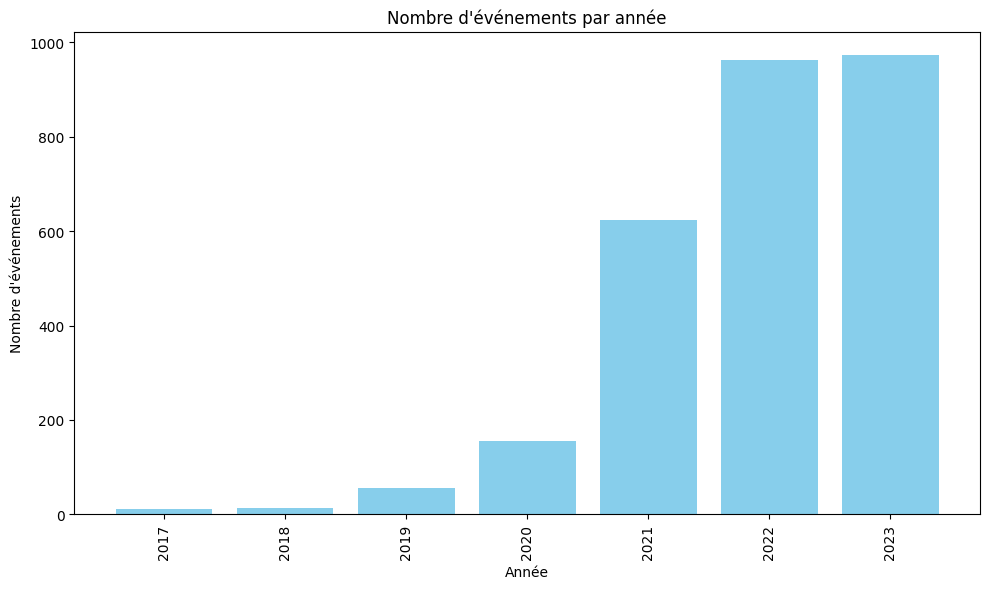

In [10]:
# Barplot du nombre de comptages par années
plt.figure(figsize=(10, 6))
plt.bar(df_comptages['ANNEE'], df_comptages['NOMBRE_EVENEMENTS'], color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre d\'événements')
plt.title('Nombre d\'événements par année')
plt.xticks(df_comptages['ANNEE'], rotation='vertical')
plt.tight_layout()
plt.show()

## Structures

In [11]:
print("Le nombre de structures ayant effectué des comptages pour l'association Merterre depuis 2017 est de : "+str(df_enriched_bdd_zds["ID_STRUCTURE"].nunique()))

Le nombre de structures ayant effectué des comptages pour l'association Merterre depuis 2017 est de : 257


In [12]:
print("Le nombre de structures dont les comptages sont enregistrés par l'association Merterre depuis 2017 est de : "+str(df_structures["ID_STRUCT"].nunique()))

Le nombre de structures dont les comptages sont enregistrés par l'association Merterre depuis 2017 est de : 578


## Collectivités

### Nombre d'evenements et structures en france actives par region, departements et communes

In [13]:
# dataframe simplifié pôur explo collectivités 
colonnes = list(range(0, 29)) + list(range(1291, 1301))
df_coll = df_raw_enriched_bdd_zds.iloc[:, colonnes]


# Pour les régions
df_regions = df_coll.groupby('REG').agg(
    Nombre_de_structures=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='nunique'),
    Nombre_d_evenements=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='count')  # Supposant que chaque ligne représente un événement
).reset_index().sort_values(by=['Nombre_de_structures', 'Nombre_d_evenements'], ascending=False)

# Pour les départements
df_dep = df_coll.groupby('DEP').agg(
    Nombre_de_structures=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='nunique'),
    Nombre_d_evenements=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='count')
).reset_index().sort_values(by=['Nombre_de_structures', 'Nombre_d_evenements'], ascending=False)

# Pour les communes
df_communes = df_coll.groupby('commune').agg(
    Nombre_de_structures=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='nunique'),
    Nombre_d_evenements=pd.NamedAgg(column='ID_STRUCTURE', aggfunc='count')
).reset_index().sort_values(by=['Nombre_de_structures', 'Nombre_d_evenements'], ascending=False)

In [14]:
df_regions.head()

REG  Nombre_de_structures  Nombre_d_evenements
11   93                   150                 1542
9    76                    50                  381
7    53                    22                  176
10   84                    20                  182
8    75                    14                  274

In [15]:
df_dep.head()

DEP  Nombre_de_structures  Nombre_d_evenements
7   13                    98                  887
57  83                    42                  483
22  34                    22                  214
3   06                    20                  132
15  29                    17                  139

In [16]:
df_communes.head()

commune  Nombre_de_structures  Nombre_d_evenements
221  Marseille                    67                  429
138     Hyères                    11                   71
268   Ouessant                    10                   75
386     Toulon                     9                   98
147  La Ciotat                     8                   62

In [17]:
# fichier geojson

gdf.head()

codgeo dep reg  xcl2154  ycl2154                   libgeo  \
0  01001  01  84   848241  6563021  L'Abergement-Clémenciat   
1  01002  01  84   887495  6548152    L'Abergement-de-Varey   
2  01004  01  84   882724  6542583        Ambérieu-en-Bugey   
3  01005  01  84   847277  6545791      Ambérieux-en-Dombes   
4  01006  01  84   902191  6519791                  Ambléon   

                                            geometry  
0  POLYGON ((4.90497 46.16079, 4.90280 46.15795, ...  
1  POLYGON ((5.40440 46.00778, 5.41628 46.00056, ...  
2  POLYGON ((5.38637 45.93121, 5.38892 45.93320, ...  
3  POLYGON ((4.88657 46.01602, 4.88808 46.01061, ...  
4  POLYGON ((5.59066 45.75997, 5.58396 45.76274, ...

### Cartes regions

Text(0.5, 1.0, 'Nombre de structures par regions')

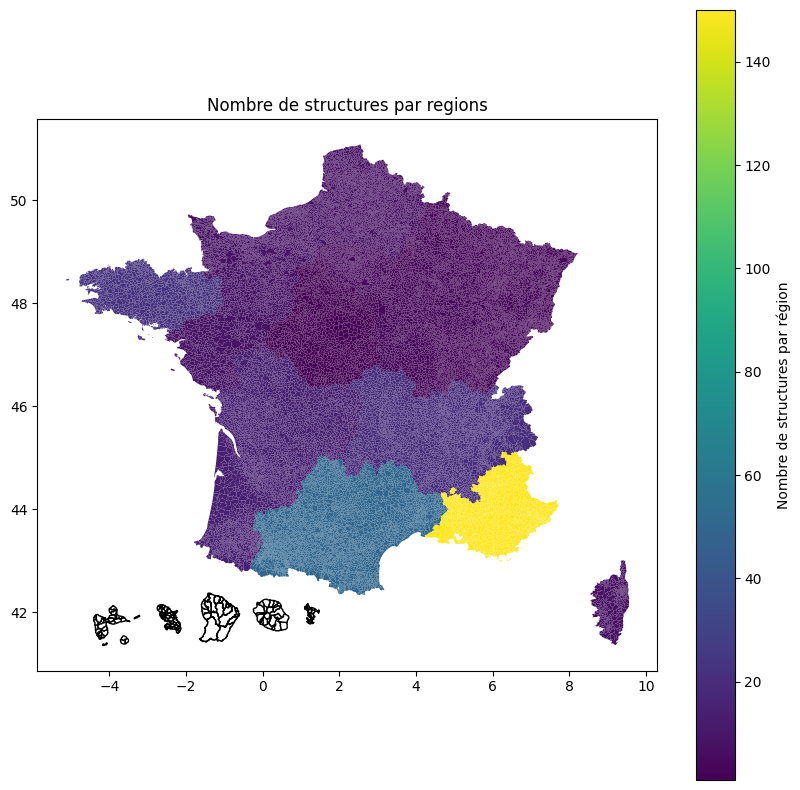

In [18]:
# Carte des regions en les nombres de structures présentes

gdf['reg'] = gdf['reg'].astype(str)
df_regions['REG'] = df_regions['REG'].astype(str)
gdf_reg = gdf.merge(df_regions[['REG', 'Nombre_de_structures', 'Nombre_d_evenements']], left_on='reg', right_on='REG', how='left')
gdf_reg['has_data'] = gdf_reg['Nombre_de_structures'].notnull()


gdf_reg['Nombre_de_structures'] = pd.to_numeric(gdf_reg['Nombre_de_structures'], errors='coerce')
gdf_reg['Nombre_d_evenements'] = pd.to_numeric(gdf_reg['Nombre_d_evenements'], errors='coerce')

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_reg.plot(column='Nombre_de_structures', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre de structures par région"})
plt .title("Nombre de structures par regions")

Text(0.5, 1.0, "Nombre d'événements par région")

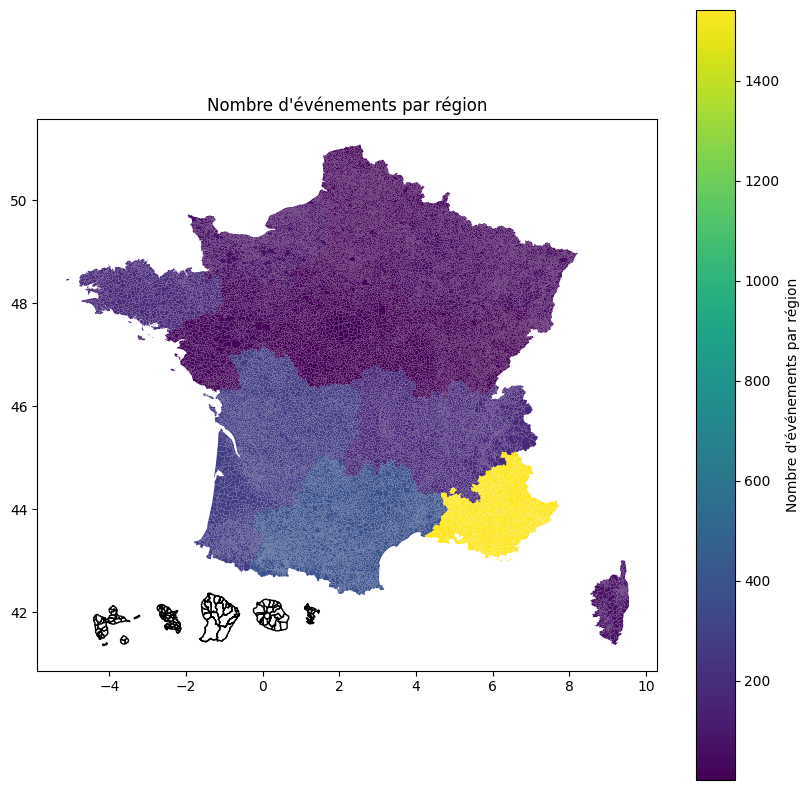

In [19]:
# Avec le nombre d'evenements présents
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_reg.plot(column='Nombre_d_evenements', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre d'événements par région"})
plt.title("Nombre d'événements par région")

### Cartes departements

Text(0.5, 1.0, 'Nombre de structures par départements')

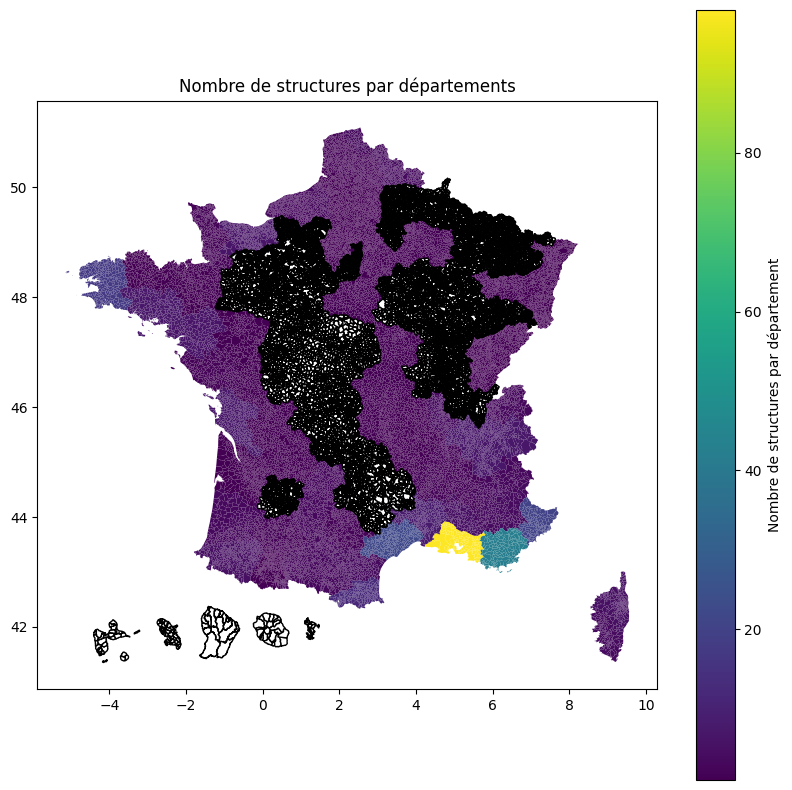

In [20]:
# Carte des departements en les nombres de structures présentes
gdf_dep = gdf.merge(df_dep[['DEP', 'Nombre_de_structures', 'Nombre_d_evenements']], left_on='dep', right_on='DEP', how='left')
gdf_dep['Nombre_de_structures'] = pd.to_numeric(gdf_dep['Nombre_de_structures'], errors='coerce')
gdf_dep['Nombre_d_evenements'] = pd.to_numeric(gdf_dep['Nombre_d_evenements'], errors='coerce')

# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep.plot(column='Nombre_de_structures', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre de structures par département"})
plt.title("Nombre de structures par départements")

Text(0.5, 1.0, "Nombre d'événements par départements")

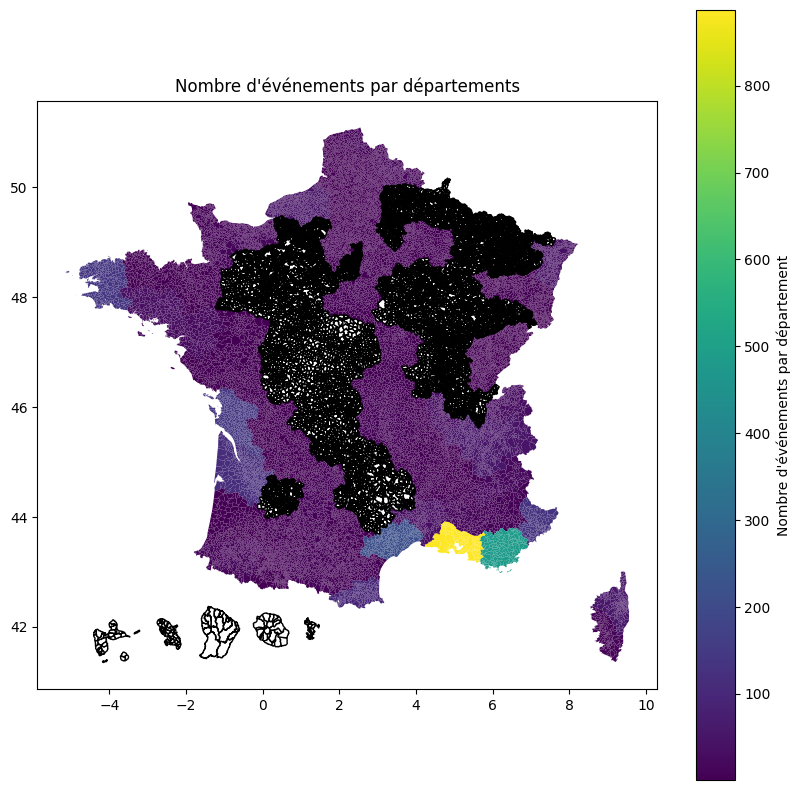

In [21]:
# Visualisations
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep.plot(column='Nombre_d_evenements', ax=ax, legend=True,
             cmap='viridis', 
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Nombre d'événements par département"})
plt.title("Nombre d'événements par départements")

## Exploration données totaux et volumineux

### Ajout d'une Variable saison

In [22]:
# Définition d'une fonction qui retourne la saison pour une date donnée
def get_saison(mois):
    if mois in [3, 4, 5]:
        return 'printemps'
    elif mois in [6, 7, 8]:
        return 'été'
    elif mois in [9, 10, 11]:
        return 'automne'
    else:
        return 'hiver'

# Ajout colonne saison
df_enriched_bdd_zds["SAISON"] = df_enriched_bdd_zds["DATE"].dt.month.apply(get_saison)


In [23]:
# liste des indices des colonnes à sélectionner
indices_colonnes_totaux_et_volumineux = list(range(0, 34)) + list(range(1291, 1303))

# Creation du df de travail
df_totaux_et_volumineux = df_enriched_bdd_zds.iloc[:, indices_colonnes_totaux_et_volumineux]
df_totaux_et_volumineux.head()

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
0         12    France  Provence-Alpes-Côte d'Azur       13.0   
1         14    France  Provence-Alpes-Côte d'Azur       13.0   
2         16    France  Provence-Alpes-Côte d'Azur       13.0   
3         17    France  Provence-Alpes-Côte d'Azur       13.0   
4         21    France                   Occitanie       34.0   

           LIEU_VILLE  LIEU_CODE_POSTAL  \
0           Marseille           13008.0   
1           Marseille           13008.0   
2              Cassis           13260.0   
3           Marseille           13015.0   
4  Causse-de-la-Selle           34380.0   

                          LIEU_COORD_GPS  LIEU_COORD_GPS_X  LIEU_COORD_GPS_Y  \
0  ["5.3416741728752","43.213786286934"]          5.341674         43.213786   
1  ["5.3429503182801","43.213941067785"]          5.342950         43.213941   
2  ["5.5392828683314","43.226082263728"]          5.539283         43.226082   
3               ["5.363345","43.353322"]          5.363345         43.353322   
4  ["3.6599318889266","43.795834831668"]          3.659932         43.795835   

                                            NOM_ZONE  SPOT_A1S  SPOT_ID  \
0                               Anse de la Maronaise         1      1.0   
1                               Anse de la Maronaise         1      1.0   
2  Vallat dres Brayes et bords des routes des ale...         0      NaN   
3                           La cascade des Aygalades         0      NaN   
4  Gorges de l'Hérault du Barrage de St MArtin de...         0      NaN   

                                           TYPE_LIEU  \
0  Littoral (terrestre)/Plage (sable, galets, gra...   
1  Littoral (terrestre)/Espace naturel en arrière...   
2  Zone naturelle ou rurale (hors littoral et mon...   
3           Cours d'eau/Berge naturelle (hors plage)   
4           Cours d'eau/Berge naturelle (hors plage)   

                                         TYPE_MILIEU  \
0                               Littoral (terrestre)   
1                               Littoral (terrestre)   
2  Zone naturelle ou rurale (hors littoral et mon...   
3                                        Cours d'eau   
4                                        Cours d'eau   

                                          TYPE_LIEU2  \
0                  Plage (sable, galets, gravillons)   
1  Espace naturel en arrière plage/côte (calanque...   
2                                        Multi-lieux   
3                       Berge naturelle (hors plage)   
4                       Berge naturelle (hors plage)   

                            TYPE_DECHET  LONGUEUR_LINEAIRE       SURFACE  \
0                                Echoué             2500.0  5.855528e+04   
1            Présent au sol (abandonné)             2770.0  1.522318e+05   
2            Présent au sol (abandonné)             1500.0  4.347502e+04   
3  Présent au sol (abandonné) et échoué                NaN           NaN   
4  Présent au sol (abandonné) et échoué            18000.0  1.274082e+06   

   ID_EVENEMENT                     NOM_EVENEMENT TYPE_EVENEMENT  \
0         178.0  Calanques Propres 2019 Maronaise      ramassage   
1         178.0  Calanques Propres 2019 Maronaise      ramassage   
2         222.0    Nettoyage du Vallat des Brayes      ramassage   
3         365.0          Opération Plastic Valley      ramassage   
4         139.0            De la rivière à la mer      ramassage   

  EVENEMENT_ENVERGURE       DATE  ANNEE               NOM_STRUCTURE  \
0   Calanques Propres 2019-05-25   2019                    MerTerre   
1   Calanques Propres 2019-05-25   2019                    MerTerre   
2   Calanques Propres 2019-05-25   2019              Le Naturoscope   
3   Calanques Propres 2019-05-25   2019  La Cité des Arts de la Rue   
4                 NaN 2019-05-19   2019                  CAP Océans   

   ID_STRUCTURE  NB_PARTICIPANTS  DUREE  NIVEAU_CARAC  VERSION_PROTOCOLE  \
0           145            100.0    5.0  

### Volumes totaux

#### Volume total de dechets récoltés 

In [24]:
# Volume total de dechets récoltés 
print("Le volume total de dechets récoltés par les actions de Merterre depuis 2017 est de : "+str(df_totaux_et_volumineux["VOLUME_TOTAL"].sum()) + " litres")

Le volume total de dechets récoltés par les actions de Merterre depuis 2017 est de : 3718703.3059999994 litres


#### Moyenne du volume de dechet récoltés par evenement

In [25]:
# Moyenne dans le volume de dechet récoltés par evenement
print("Le volume moyen de dechets récoltés par les actions de Merterre depuis 2017 est de : "+str(df_totaux_et_volumineux["VOLUME_TOTAL"].mean()) + " litres")

Le volume moyen de dechets récoltés par les actions de Merterre depuis 2017 est de : 1330.008335479256 litres


#### Distribution du volume de dechet récoltés par evenement

Text(0, 0.5, 'Volume Total')

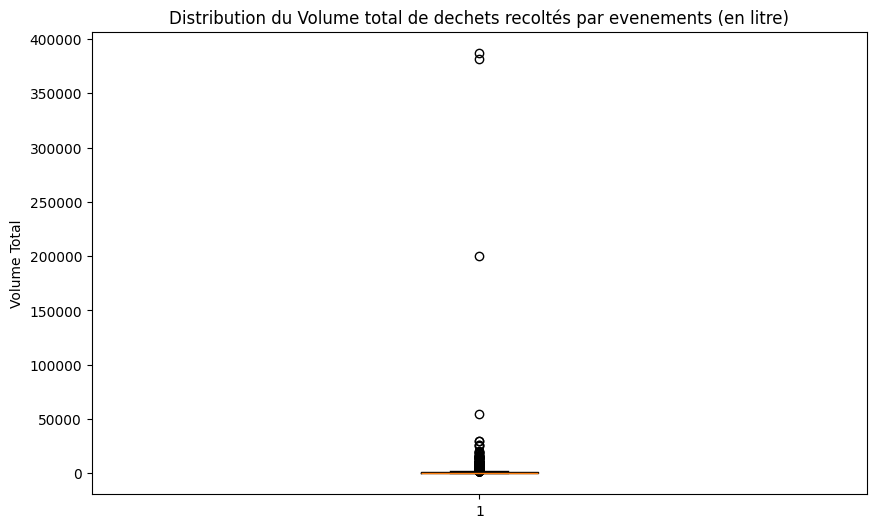

In [26]:
# Création du graphique à moustaches pour VOLUME_TOTAL
plt.figure(figsize=(10, 6))
plt.boxplot(df_totaux_et_volumineux["VOLUME_TOTAL"])
plt.title("Distribution du Volume total de dechets recoltés par evenements (en litre)")
plt.ylabel("Volume Total")

Text(0, 0.5, 'Volume Total')

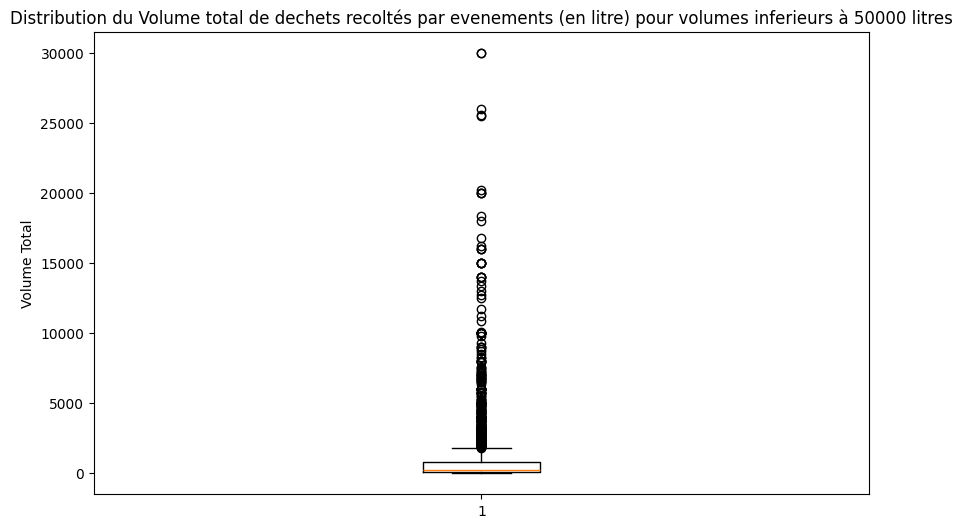

In [27]:
# Création du graphique à moustaches pour VOLUME_TOTAL < 50000
df_boxplot_50000 = df_totaux_et_volumineux[df_totaux_et_volumineux["VOLUME_TOTAL"]<50000]
plt.figure(figsize=(10, 6))
plt.boxplot(df_boxplot_50000["VOLUME_TOTAL"])
plt.title("Distribution du Volume total de dechets recoltés par evenements (en litre) pour volumes inferieurs à 50000 litres")
plt.ylabel("Volume Total")

#### Volumes totaux par type de materiau

In [28]:
# Liste des colonnes à vérifier pour NaN
colonnes_materiau = [
    "GLOBAL_VOLUME_PLASTIQUE", "GLOBAL_VOLUME_CAOUTCHOUC", "GLOBAL_VOLUME_BOIS",
    "GLOBAL_VOLUME_TEXTILE", "GLOBAL_VOLUME_PAPIER", "GLOBAL_VOLUME_METAL",
    "GLOBAL_VOLUME_VERRE", "GLOBAL_VOLUME_AUTRE"
]

# Création de df_enriched_bdd_zds_materiau en supprimant les lignes avec un NaN dans les colonnes spécifiées
df_enriched_bdd_zds_materiau = df_enriched_bdd_zds.dropna(subset=colonnes_materiau)

In [29]:
# Calcul des totaux et des moyennes pour chaque colonne matériau
total_materiau = df_enriched_bdd_zds_materiau[colonnes_materiau].sum()
moyenne_materiau = df_enriched_bdd_zds_materiau[colonnes_materiau].mean()

# Création d'un DataFrame avec les totaux et les moyennes
df_resume_materiau = pd.DataFrame({'Total': total_materiau, 'Moyenne': moyenne_materiau}).reset_index()
df_resume_materiau.sort_values(by = "Total", ascending = False, inplace = True)

# Renommage des colonnes pour une meilleure clarté
df_resume_materiau.rename(columns={'index': 'Materiau'}, inplace=True)

df_resume_materiau

Materiau          Total     Moyenne
0   GLOBAL_VOLUME_PLASTIQUE  768054.188216  296.088739
5       GLOBAL_VOLUME_METAL  439241.722933  169.329885
7       GLOBAL_VOLUME_AUTRE  330687.456900  127.481672
1  GLOBAL_VOLUME_CAOUTCHOUC  193729.245970   74.683595
6       GLOBAL_VOLUME_VERRE  179008.791005   69.008786
2        GLOBAL_VOLUME_BOIS  139856.656901   53.915442
4      GLOBAL_VOLUME_PAPIER  121522.473105   46.847522
3     GLOBAL_VOLUME_TEXTILE   94321.776170   36.361517

Text(0, 0.5, 'Total des Volumes')

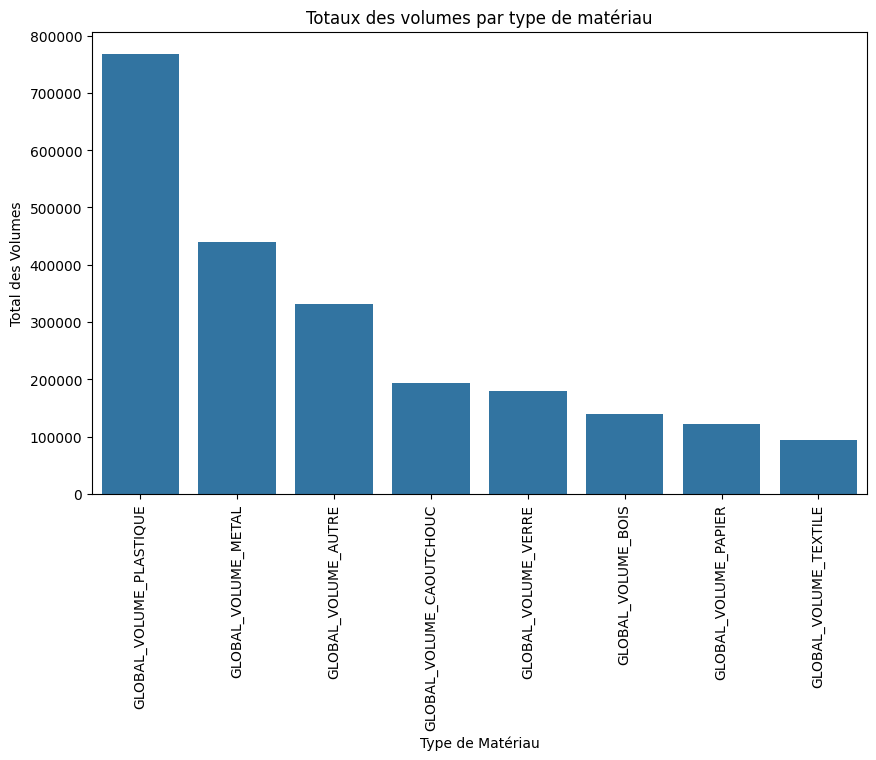

In [30]:
# Création du barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resume_materiau, x='Materiau', y='Total')

# Affichage
plt.xticks(rotation=90)
plt.title('Totaux des volumes par type de matériau')
plt.xlabel('Type de Matériau')
plt.ylabel('Total des Volumes')

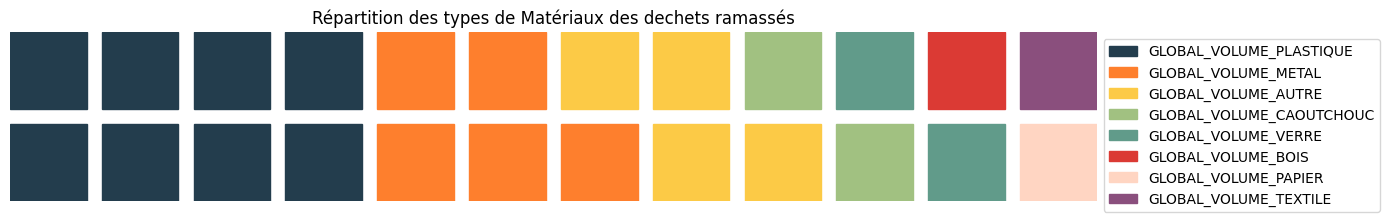

In [31]:
# Création du Waffle Chart

# Normalisation des valeurs en divisant par le minimum non nul pour maintenir les proportions
min_non_zero = df_resume_materiau['Total'][df_resume_materiau['Total'] > 0].min()
df_resume_materiau['Normalized'] = df_resume_materiau['Total'] / min_non_zero

# Utilisation des valeurs normalisées pour le waffle chart
data = pd.Series(df_resume_materiau.Normalized.values, index=df_resume_materiau.Materiau).to_dict()
fig = plt.figure(
    figsize=(14,9),
    FigureClass=Waffle, 
    rows=2,
    values=data, 
    colors=["#233D4D",  # Bleu foncé
    "#FE7F2D",  # Orange
    "#FCCA46",  # Jaune
    "#A1C181",  # Vert clair
    "#619B8A",  # Vert mer
    "#DB3A34",  # Rouge
    "#FFD5C2",  # Pêche
    "#8A4F7D"   # Violet
           ],
    title={'label': 'Répartition des types de Matériaux des dechets ramassés', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
#   icons='square',
    icon_size=100,
    icon_legend=True,
)


#### Volumes totaux mensuels

In [32]:
# nouvelle colonne 'YEAR_MONTH'
df_totaux_et_volumineux['YEAR_MONTH'] = df_totaux_et_volumineux['DATE'].dt.to_period('M')
# volume total mensuel
df_volume_total_mensuel = df_totaux_et_volumineux.groupby('YEAR_MONTH')['VOLUME_TOTAL'].sum().reset_index()

/tmp/ipykernel_28091/1190459112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totaux_et_volumineux['YEAR_MONTH'] = df_totaux_et_volumineux['DATE'].dt.to_period('M')


Text(0, 0.5, 'Volume Total')

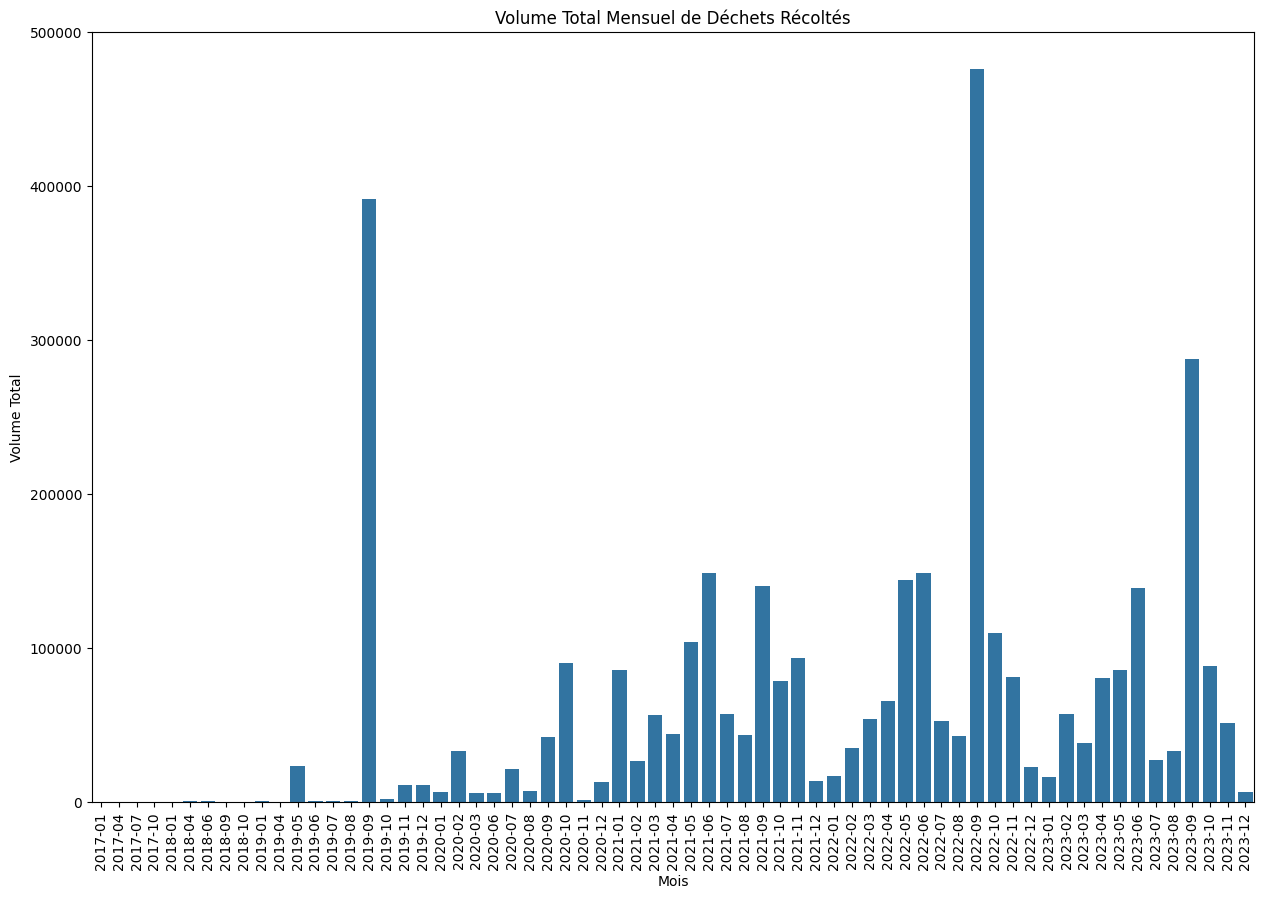

In [33]:
# Changement du type de colonne pour l'affichage
df_volume_total_mensuel['YEAR_MONTH'] = df_volume_total_mensuel['YEAR_MONTH'].astype(str)

plt.figure(figsize=(15, 10))
# Création du barplot
sns.barplot(x='YEAR_MONTH', y='VOLUME_TOTAL', data=df_volume_total_mensuel)

# Affichage
plt.xticks(rotation=90)
plt.title('Volume Total Mensuel de Déchets Récoltés')
plt.xlabel('Mois')
plt.ylabel('Volume Total')

Text(0, 0.5, 'Volume Total Moyen')

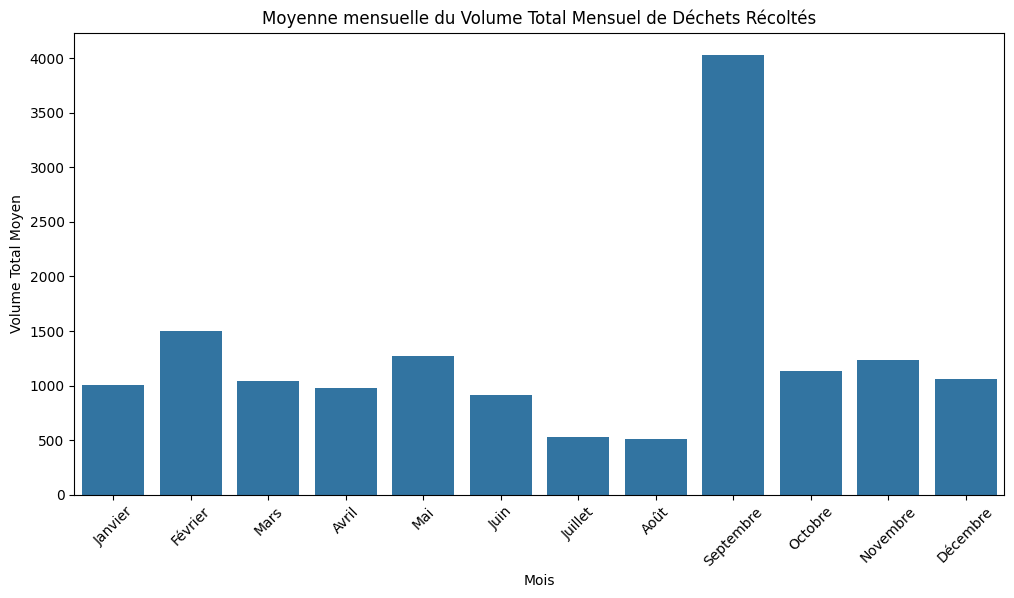

In [34]:
# Ajout d'une variable mois
df_enriched_bdd_zds['MONTH'] = df_enriched_bdd_zds['DATE'].dt.month

# Moyenne du volume total pour chaque mois
df_moyenne_mensuelle = df_enriched_bdd_zds.groupby('MONTH')['VOLUME_TOTAL'].mean().reset_index()

# Mapping pour convertir les mois de numéro à nom
mois_mapping = {1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin',
                7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'}

# mois en noms
df_moyenne_mensuelle['MONTH'] = df_moyenne_mensuelle['MONTH'].map(mois_mapping)

# Taille du graphique
plt.figure(figsize=(12, 6))

# Création du barplot
sns.barplot(x='MONTH', y='VOLUME_TOTAL', data=df_moyenne_mensuelle)

# Affichage
plt.xticks(rotation=45)
plt.title('Moyenne mensuelle du Volume Total Mensuel de Déchets Récoltés')
plt.xlabel('Mois')
plt.ylabel('Volume Total Moyen')

In [35]:
df_moyenne_mensuelle

MONTH  VOLUME_TOTAL
0     Janvier   1002.245952
1     Février   1501.137426
2        Mars   1041.077568
3       Avril    979.053231
4         Mai   1266.138333
5        Juin    915.934411
6     Juillet    526.704850
7        Août    514.500533
8   Septembre   4029.547560
9     Octobre   1129.351365
10   Novembre   1234.591140
11   Décembre   1057.369841

#### Volumes totaux departement/region/bassin de vie

##### Barplot region

Text(0, 0.5, 'Région')

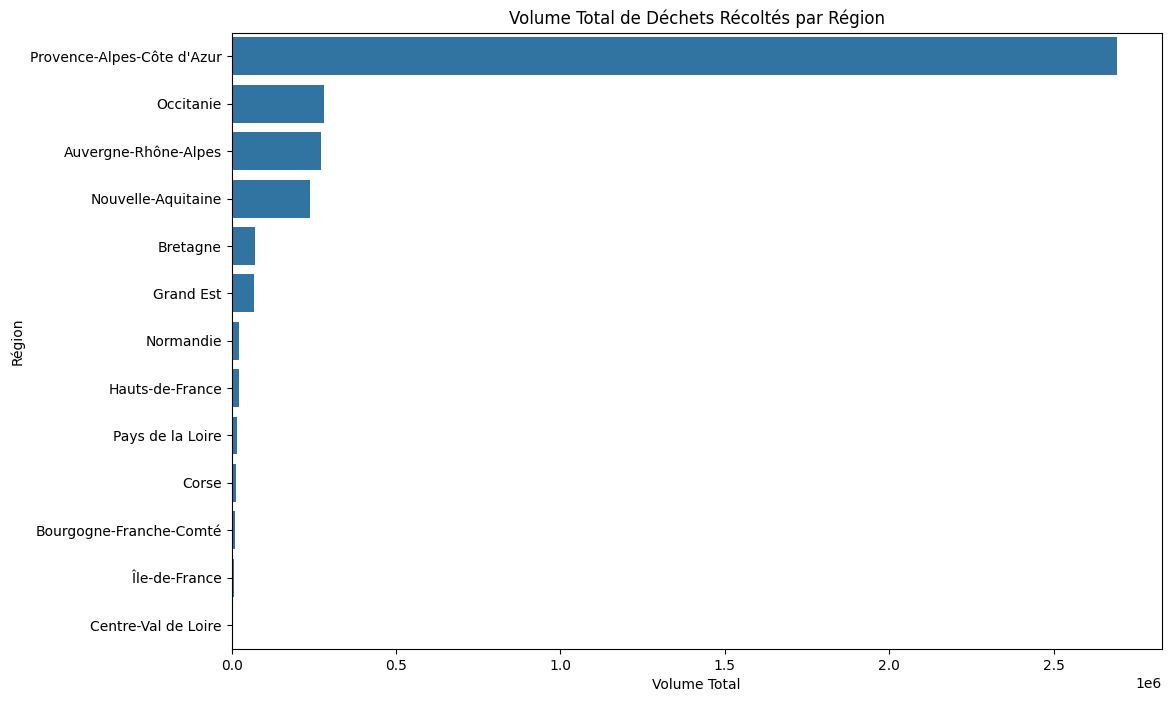

In [36]:
# Groupement par région et calcul du volume total
volume_par_region = df_enriched_bdd_zds.groupby('REGION')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats
volume_par_region_sorted = volume_par_region.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création du barplot pour le volume total par région
plt.figure(figsize=(12, 8))
sns.barplot(x='VOLUME_TOTAL', y='REGION', data=volume_par_region_sorted)
plt.title('Volume Total de Déchets Récoltés par Région')
plt.xlabel('Volume Total')
plt.ylabel('Région')

##### Carte Region

Text(0.5, 1.0, 'Volume total de dechets récoltés (en litres) par region')

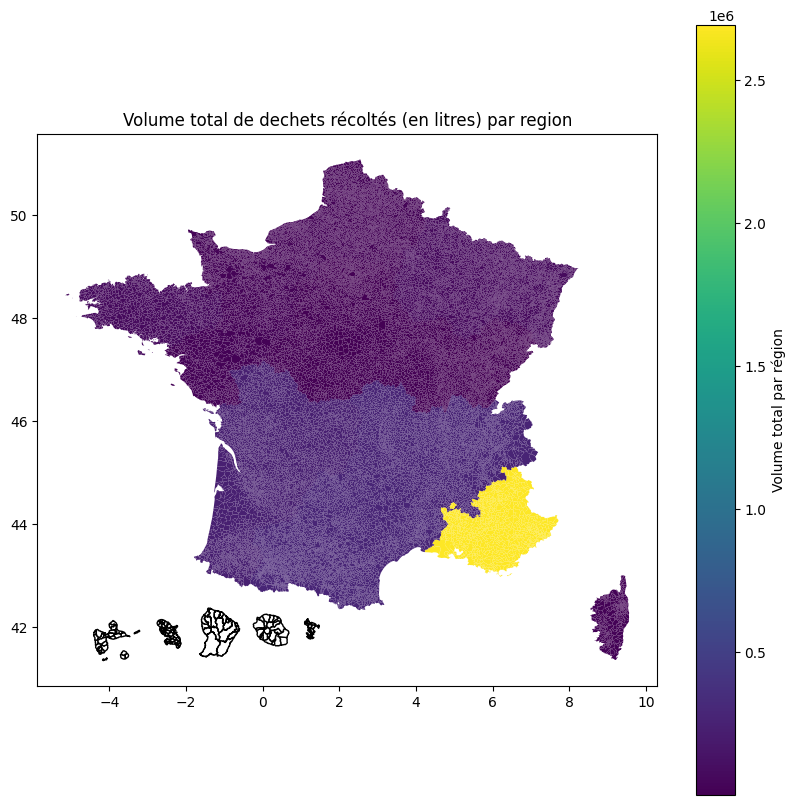

In [37]:
# Groupement par dregion et calcul du volume total
volume_par_region = df_enriched_bdd_zds.groupby('REG')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats pour une meilleure visualisation
volume_par_region_sorted = volume_par_region.sort_values(by='VOLUME_TOTAL', ascending=False)

# Carte des departements et des volumes de dechets

gdf['reg'] = gdf['reg'].astype(str)
volume_par_region_sorted['REG'] = volume_par_region_sorted['REG'].astype(str)
gdf_dep_volume = gdf.merge(volume_par_region_sorted, left_on='reg', right_on='REG', how='left')
gdf_dep_volume['VOLUME_TOTAL'] = pd.to_numeric(gdf_dep_volume['VOLUME_TOTAL'], errors='coerce')
# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep_volume.plot(column='VOLUME_TOTAL', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Volume total par région"})
plt.title("Volume total de dechets récoltés (en litres) par region")

##### Barplot departements

Text(0, 0.5, 'Département')

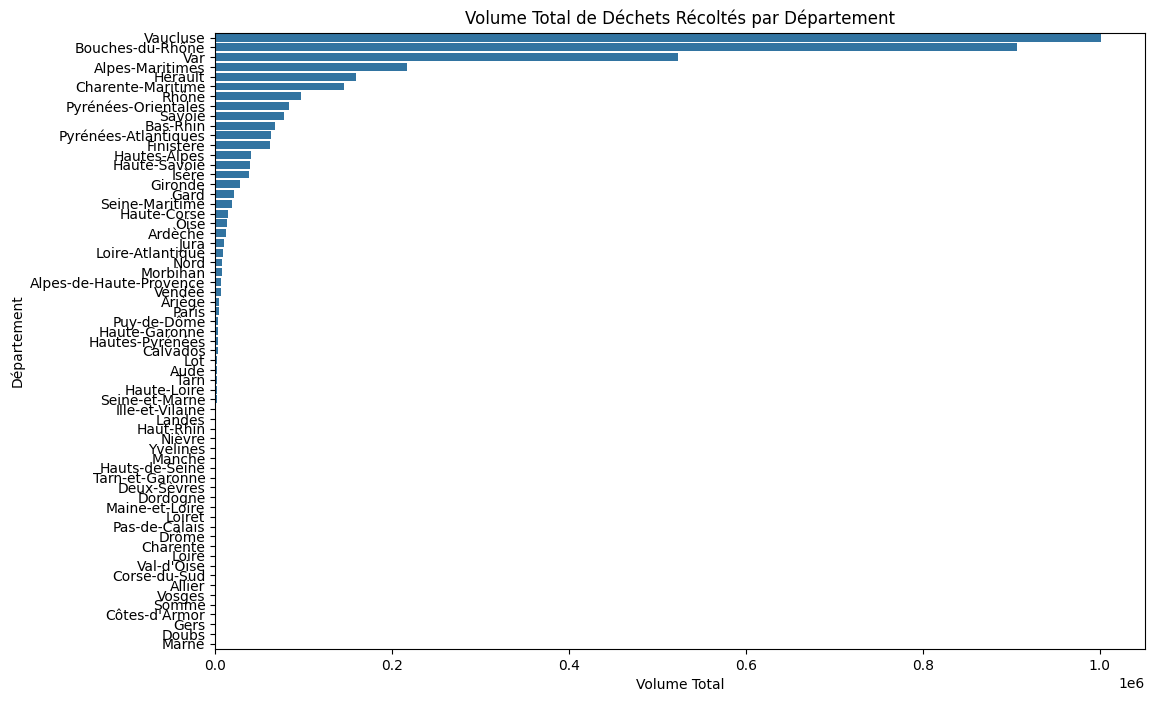

In [38]:
# Groupement par département et calcul du volume total
volume_par_departement = df_enriched_bdd_zds.groupby('DEPARTEMENT')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats pour une meilleure visualisation
volume_par_departement_sorted = volume_par_departement.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création du barplot pour le volume total par département
plt.figure(figsize=(12, 8))
sns.barplot(x='VOLUME_TOTAL', y='DEPARTEMENT', data=volume_par_departement_sorted)
plt.title('Volume Total de Déchets Récoltés par Département')
plt.xlabel('Volume Total')
plt.ylabel('Département')

##### Carte departement

Text(0.5, 1.0, 'Volume total de dechets récoltés (en litres) par département')

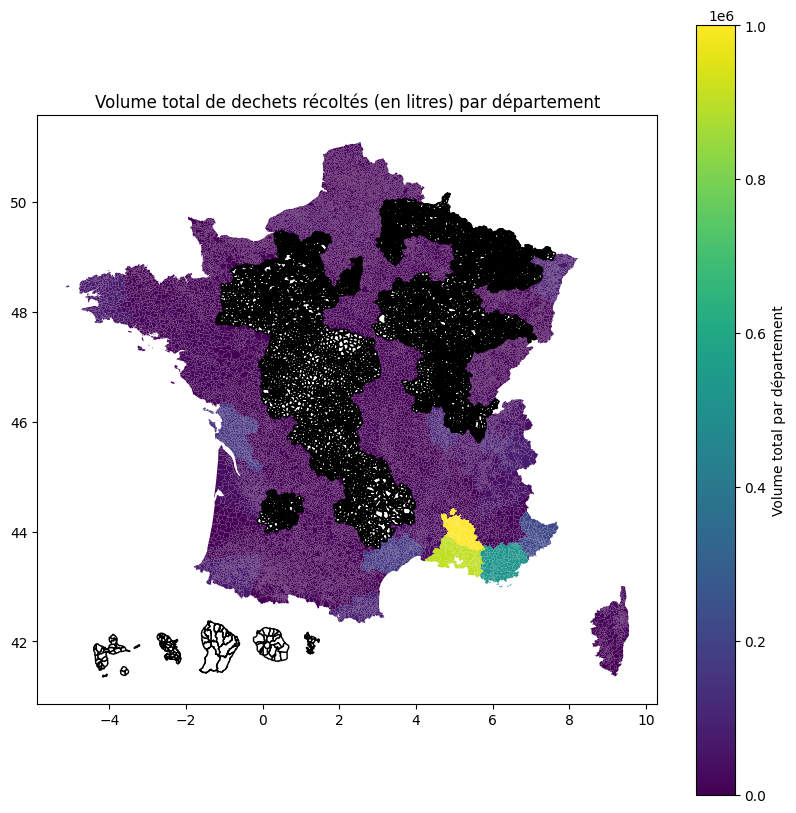

In [39]:
# Groupement par département et calcul du volume total
volume_par_departement = df_enriched_bdd_zds.groupby('DEP')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats pour une meilleure visualisation
volume_par_departement_sorted = volume_par_departement.sort_values(by='VOLUME_TOTAL', ascending=False)

# Carte des departements et des volumes de dechets

gdf['dep'] = gdf['dep'].astype(str)
volume_par_departement_sorted['DEP'] = volume_par_departement_sorted['DEP'].astype(str)
gdf_dep_volume = gdf.merge(volume_par_departement_sorted, left_on='dep', right_on='DEP', how='left')
gdf_dep_volume['VOLUME_TOTAL'] = pd.to_numeric(gdf_dep_volume['VOLUME_TOTAL'], errors='coerce')
# Visualisation
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_dep_volume.plot(column='VOLUME_TOTAL', ax=ax, legend=True,
             cmap='viridis',
             missing_kwds={'color': 'white',
                           'edgecolor': 'black',
                           'label': 'Pas de données'},
             legend_kwds={'label': "Volume total par département"})
plt.title("Volume total de dechets récoltés (en litres) par département")

##### Barplot Bassin de vie

Text(0, 0.5, 'Bassin de Vie')

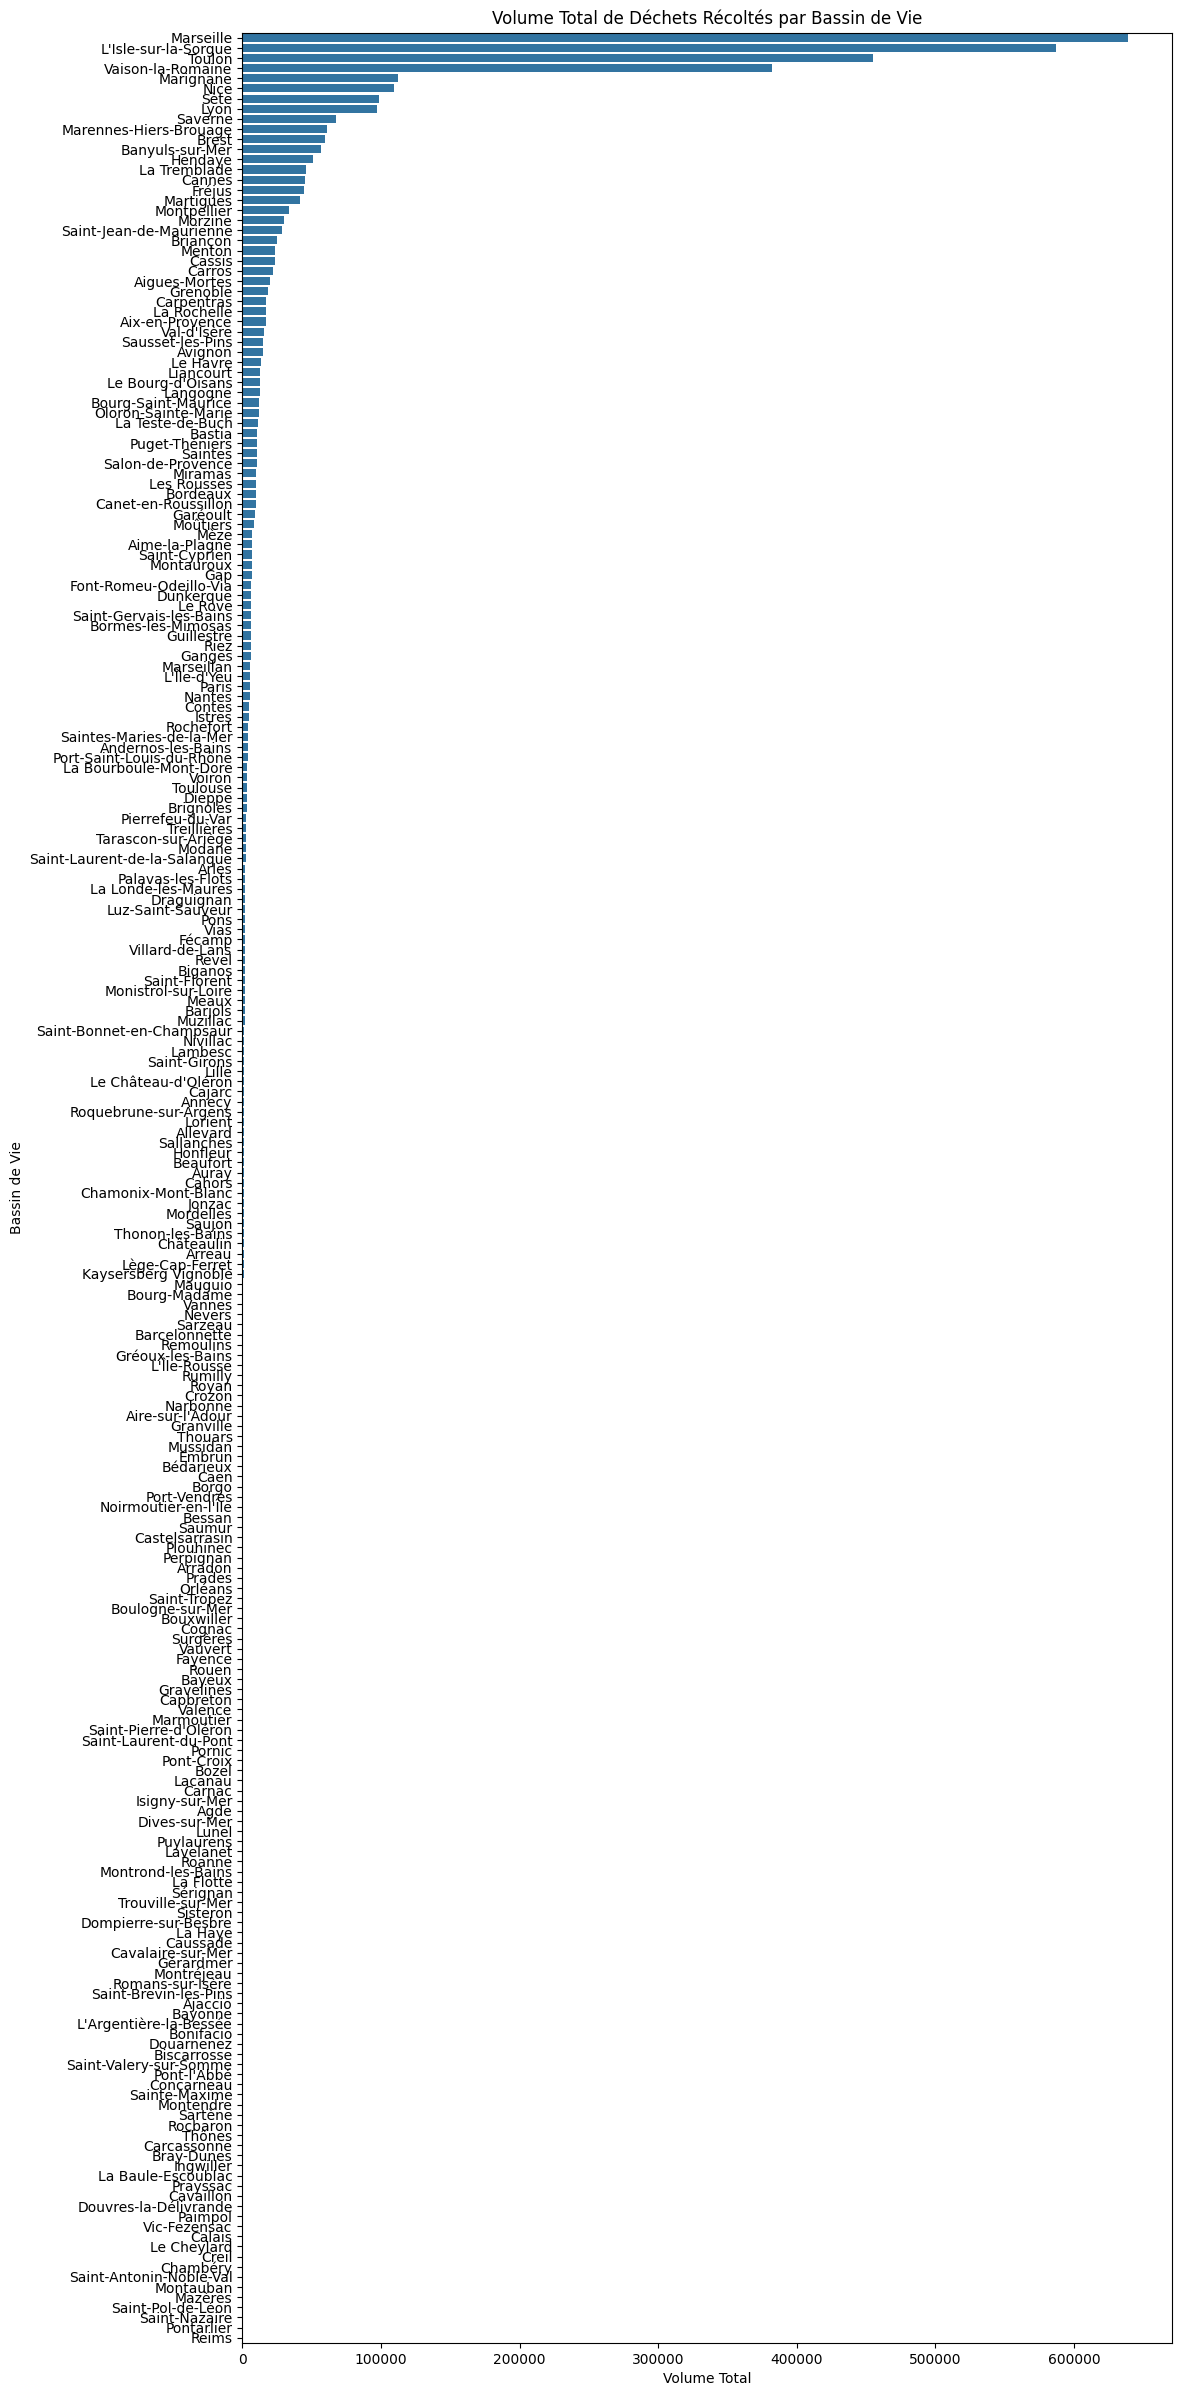

In [40]:
# Groupement par bassin de vie et calcul du volume total
volume_par_bassin = df_enriched_bdd_zds.groupby('BASSIN_DE_VIE')['VOLUME_TOTAL'].sum().reset_index()

# Tri des résultats
volume_par_bassin_sorted = volume_par_bassin.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création du barplot pour le volume total par bassin de vie
plt.figure(figsize=(12, 30))
sns.barplot(x='VOLUME_TOTAL', y='BASSIN_DE_VIE', data=volume_par_bassin_sorted)
plt.title('Volume Total de Déchets Récoltés par Bassin de Vie')
plt.xlabel('Volume Total')
plt.ylabel('Bassin de Vie')

#### Volumes totaux types de lieux

In [41]:
# Quels sont les differents types de lieux ou ont lieu les ramassages?
df_enriched_bdd_zds['TYPE_LIEU'].unique()

array(['Littoral (terrestre)/Plage (sable, galets, gravillons)',
       'Littoral (terrestre)/Espace naturel en arrière plage/côte (calanques, colline …)',
       'Zone naturelle ou rurale (hors littoral et montagne)/Multi-lieux',
       "Cours d'eau/Berge naturelle (hors plage)",
       'Littoral (terrestre)/Digue et ouvrage',
       'Littoral (terrestre)/Rocher et crique',
       'Zone naturelle ou rurale (hors littoral et montagne)/Autre espace naturel',
       'Mer - Océan/Mer - Océan', 'Multi-lieux/Multi-lieux',
       'Zone naturelle ou rurale (hors littoral et montagne)/Route',
       'Littoral (terrestre)/Port', 'Zone urbaine/Route, rue, place',
       'Lagune et étang côtier/Canaux et Salins',
       'Littoral (terrestre)/Sentier et chemin',
       'Zone naturelle ou rurale (hors littoral et montagne)/Champ - prairie - lande - garrigue - maquis',
       'Zone naturelle ou rurale (hors littoral et montagne)/Forêt',
       'Zone urbaine/Parc urbain - Jardin public',
       'Litt

In [42]:
# Quels sont les differents types de milieux ou ont lieu les ramassages?
df_enriched_bdd_zds['TYPE_MILIEU'].unique()

array(['Littoral (terrestre)',
       'Zone naturelle ou rurale (hors littoral et montagne)',
       "Cours d'eau", 'Mer - Océan', 'Multi-lieux', 'Zone urbaine',
       'Lagune et étang côtier', 'Lac et Marais', 'Montagne'],
      dtype=object)

In [43]:
# Nombre de ligne à afficher maximum = 100
pd.set_option('display.max_rows', 100)

# Grouper par 'TYPE_MILIEU' et compter les occurrences de chaque 'TYPE_LIEU' pour chaque groupe
df_groupes_type_milieu = df_enriched_bdd_zds.groupby('TYPE_MILIEU')['TYPE_LIEU'].value_counts().reset_index(name='COUNT')
df_groupes_type_milieu

TYPE_MILIEU  \
0                                         Cours d'eau   
1                                         Cours d'eau   
2                                         Cours d'eau   
3                                         Cours d'eau   
4                                         Cours d'eau   
5                                         Cours d'eau   
6                                         Cours d'eau   
7                                         Cours d'eau   
8                                         Cours d'eau   
9                                         Cours d'eau   
10                                        Cours d'eau   
11                                        Cours d'eau   
12                                        Cours d'eau   
13                                        Cours d'eau   
14                                      Lac et Marais   
15                                      Lac et Marais   
16                                      Lac et Marais   
17                                      Lac et Marais   
18                                      Lac et Marais   
19                                      Lac et Marais   
20                             Lagune et étang côtier   
21                             Lagune et étang côtier   
22                             Lagune et étang côtier   
23                             Lagune et étang côtier   
24                             Lagune et étang côtier   
25                             Lagune et étang côtier   
26                             Lagune et étang côtier   
27                             Lagune et étang côtier   
28                             Lagune et étang côtier   
29                             Lagune et étang côtier   
30                             Lagune et étang côtier   
31                             Lagune et étang côtier   
32                             Lagune et étang côtier   
33                             Lagune et étang côtier   
34                             Lagune et étang côtier   
35                             Lagune et étang côtier   
36                             Lagune et étang côtier   
37                             Lagune et étang côtier   
38                             Lagune et étang côtier   
39                             Lagune et étang côtier   
40                             Lagune et étang côtier   
41                             Lagune et étang côtier   
42                             Lagune et étang côtier   
43                               Littoral (terrestre)   
44                               Littoral (terrestre)   
45                               Littoral (terrestre)   
46                               Littoral (terrestre)   
47                               Littoral (terrestre)   
48                               Littoral (terrestre)   
49                               Littoral (terrestre)   
50                               Littoral (terrestre)   
51                               Littoral (terrestre)   
52                               Littoral (terrestre)   
53                               Littoral (terrestre)   
54                               Littoral (terrestre)   
55                               Littoral (terrestre)   
56                               Littoral (terrestre)   
57                               Littoral (terrestre)   
58                               Littoral (terrestre)   
59                               Littoral (terrestre)   
60                               Littoral (terrestre)   
61                               Littoral (terrestre)   
62                               Littoral (terrestre)   
63                                        Mer - Océan   
64                                           Montagne   
65                                           Montagne   
66                                           Montagne   
67                                           Montagne   
68                                           Montagne   
69                                           Montagn

In [44]:
# Grouper par 'TYPE_MILIEU' et 'TYPE_LIEU', et sommer les volumes totaux pour chaque groupe
df_volumes_type_milieu = df_enriched_bdd_zds.groupby(['TYPE_MILIEU', 'TYPE_LIEU'])['VOLUME_TOTAL'].sum().reset_index()

# Affichage du DataFrame pour vérification
df_volumes_type_milieu

TYPE_MILIEU  \
0                                         Cours d'eau   
1                                         Cours d'eau   
2                                         Cours d'eau   
3                                         Cours d'eau   
4                                         Cours d'eau   
5                                         Cours d'eau   
6                                         Cours d'eau   
7                                         Cours d'eau   
8                                         Cours d'eau   
9                                         Cours d'eau   
10                                        Cours d'eau   
11                                        Cours d'eau   
12                                        Cours d'eau   
13                                        Cours d'eau   
14                                      Lac et Marais   
15                                      Lac et Marais   
16                                      Lac et Marais   
17                                      Lac et Marais   
18                                      Lac et Marais   
19                                      Lac et Marais   
20                             Lagune et étang côtier   
21                             Lagune et étang côtier   
22                             Lagune et étang côtier   
23                             Lagune et étang côtier   
24                             Lagune et étang côtier   
25                             Lagune et étang côtier   
26                             Lagune et étang côtier   
27                             Lagune et étang côtier   
28                             Lagune et étang côtier   
29                             Lagune et étang côtier   
30                             Lagune et étang côtier   
31                             Lagune et étang côtier   
32                             Lagune et étang côtier   
33                             Lagune et étang côtier   
34                             Lagune et étang côtier   
35                             Lagune et étang côtier   
36                             Lagune et étang côtier   
37                             Lagune et étang côtier   
38                             Lagune et étang côtier   
39                             Lagune et étang côtier   
40                             Lagune et étang côtier   
41                             Lagune et étang côtier   
42                             Lagune et étang côtier   
43                               Littoral (terrestre)   
44                               Littoral (terrestre)   
45                               Littoral (terrestre)   
46                               Littoral (terrestre)   
47                               Littoral (terrestre)   
48                               Littoral (terrestre)   
49                               Littoral (terrestre)   
50                               Littoral (terrestre)   
51                               Littoral (terrestre)   
52                               Littoral (terrestre)   
53                               Littoral (terrestre)   
54                               Littoral (terrestre)   
55                               Littoral (terrestre)   
56                               Littoral (terrestre)   
57                               Littoral (terrestre)   
58                               Littoral (terrestre)   
59                               Littoral (terrestre)   
60                               Littoral (terrestre)   
61                               Littoral (terrestre)   
62                               Littoral (terrestre)   
63                                        Mer - Océan   
64                                           Montagne   
65                                           Montagne   
66                                           Montagne   
67                                           Montagne   
68                                           Montagne   
69                                           Montagn

Text(0, 0.5, 'Volume total de déchets')

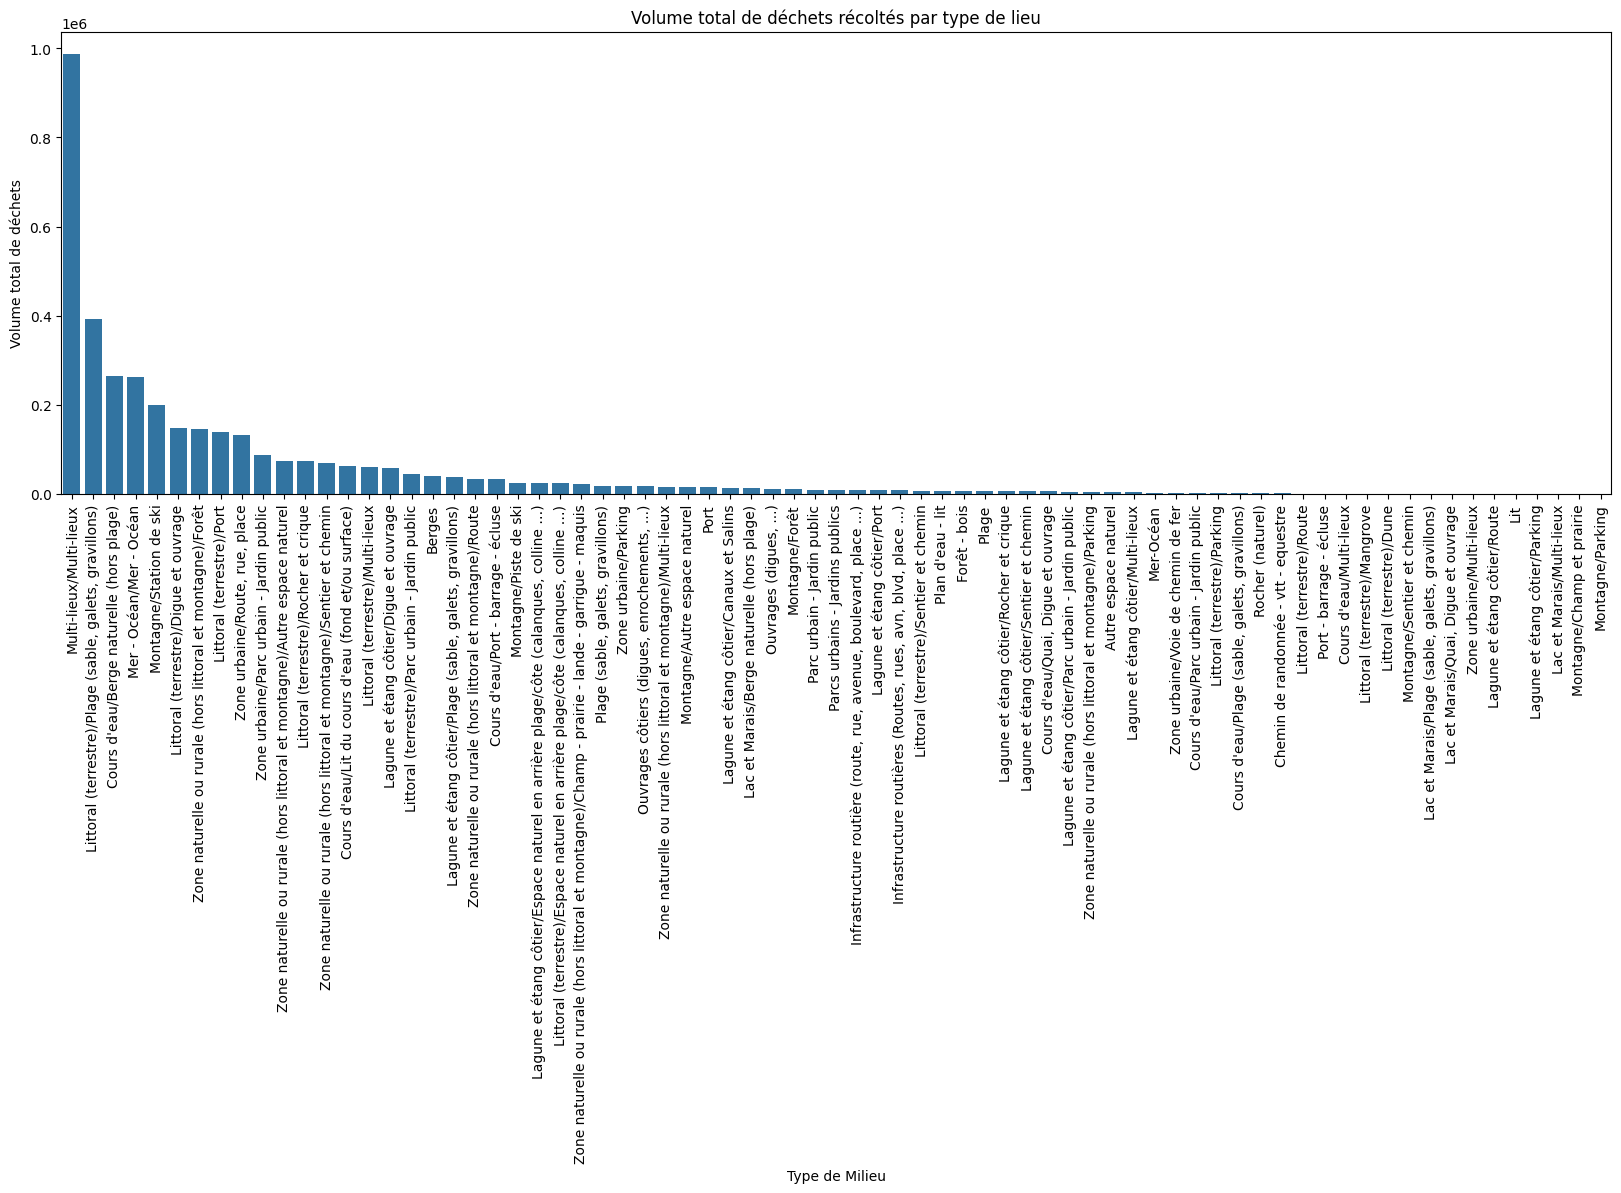

In [45]:
# Grouper par 'TYPE_MILIEU' uniquement et sommer les volumes totaux pour chaque type de milieu
df_volumes_par_milieu = df_enriched_bdd_zds.groupby('TYPE_LIEU')['VOLUME_TOTAL'].sum().reset_index()
df_volumes_par_milieu = df_volumes_par_milieu.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création d'un barplot avec le volume total par type de milieu
plt.figure(figsize=(20, 6))  # Ajustez la taille selon vos besoins
sns.barplot(data=df_volumes_par_milieu, x='TYPE_LIEU', y='VOLUME_TOTAL')

# Amélioration de l'affichage
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Volume total de déchets récoltés par type de lieu')  # Ajout d'un titre
plt.xlabel('Type de Milieu')  # Nom de l'axe X
plt.ylabel('Volume total de déchets')  # Nom de l'axe Y

Text(0, 0.5, 'Volume total de déchets')

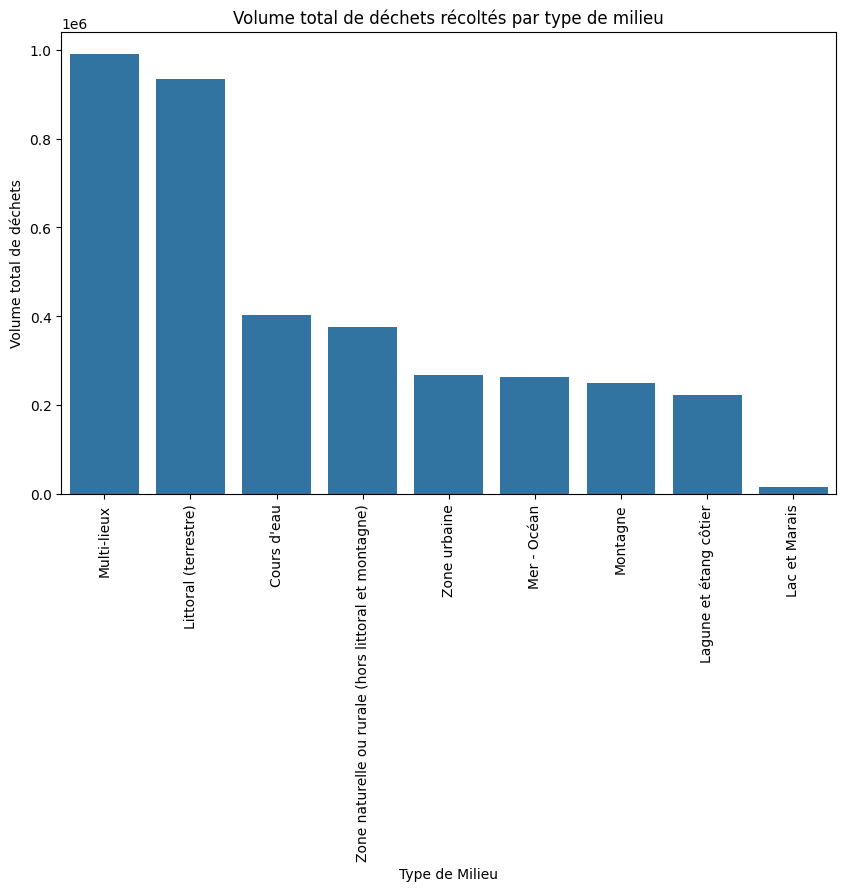

In [46]:
# Grouper par 'TYPE_MILIEU' uniquement et sommer les volumes totaux pour chaque type de milieu
df_volumes_par_milieu = df_enriched_bdd_zds.groupby('TYPE_MILIEU')['VOLUME_TOTAL'].sum().reset_index()
df_volumes_par_milieu = df_volumes_par_milieu.sort_values(by='VOLUME_TOTAL', ascending=False)

# Création d'un barplot avec le volume total par type de milieu
plt.figure(figsize=(10, 6))  # Ajustez la taille selon vos besoins
sns.barplot(data=df_volumes_par_milieu, x='TYPE_MILIEU', y='VOLUME_TOTAL')

# Amélioration de l'affichage
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Volume total de déchets récoltés par type de milieu') 
plt.xlabel('Type de Milieu')
plt.ylabel('Volume total de déchets')

## Dechets indicateurs

### Carte Présence/absence

une carte pour présence/ absence d'un dechet indicateur avec tous les spots de ramassage ou ils ont été comptabilisés, de couleur différente pour présence et abscence de ce déchet et le nombre ramassé inscrit à coté du point si présence
Filtres :1 er niveau : collectivité, 2eme niveau : dechet indicateur, dechet indicateur DCSMM, Responsabilité élargie du producteur (REP)

In [47]:
# Préparation du dataframe pour la carte présence / par dechet indicateur

df_presence_absence = df_enriched_bdd_zds[df_enriched_bdd_zds["NIVEAU_CARAC"].isin([2,3,4])]
df_presence_absence.iloc[:, 93:1290] = df_presence_absence.iloc[:, 93:1290].fillna(0.0)
# Suppression des variables marques et autre dechets
df_presence_absence = df_presence_absence.drop(df_presence_absence.columns[530:1246], axis=1)
# Changement de noms des colonnes
df_presence_absence.columns = [col.replace('NB_DECHET_GROUPE_', '') if col.startswith('NB_DECHET_GROUPE_') else col for col in df_presence_absence.columns]
df_presence_absence.columns = [col.replace('NB_DECHET_', '') if col.startswith('NB_DECHET_DCSMM_') else col for col in df_presence_absence.columns]
df_presence_absence.columns = [col.replace('NB_DECHET_', '') if col.startswith('NB_DECHET_REP_') else col for col in df_presence_absence.columns]
df_presence_absence.columns = [col.replace('NB_DECHET_', '') if col.startswith('NB_DECHET_SECTEUR_') else col for col in df_presence_absence.columns]

In [48]:
# Exemple de carte pour les bouteilles en plastique region PACA

df = df_presence_absence

# Agrégation des données pour chaque ensemble unique de coordonnées GPS
aggregated_data = df.groupby(['LIEU_COORD_GPS_Y', 'LIEU_COORD_GPS_X']).agg(
    sum_bouteilles_alimentaires=("BOUTEILLES EN PLASTIQUE ALIMENTAIRE", 'sum'),
    sum_bouteilles_sup_05l=('DCSMM_BOUTEILLES EN PLASTIQUE ALIMENTAIRE SUPÉRIEURES À 0,5 L', 'sum'),
    sum_bouteilles_inf_05l=('DCSMM_BOUTEILLES EN PLASTIQUE ALIMENTAIRE INFÉRIEURES À 0,5 L', 'sum'),
    count=('LIEU_COORD_GPS_Y', 'count')  # Compter le nombre de doublons pour chaque position
).reset_index()

# Coordonnées centrées sur la région PACA (Marseille comme point de référence)
coords_paca = [43.296482, 5.369780]
zoom_paca = 8

# Initialisation de la carte avec le centrage sur PACA
map_indicateurs = folium.Map(location=coords_paca, zoom_start=zoom_paca)

# Ajout des marqueurs basé sur l'agrégation
for _, row in aggregated_data.iterrows():
    total = row['sum_bouteilles_alimentaires'] + row['sum_bouteilles_sup_05l'] + row['sum_bouteilles_inf_05l']
    count = row['count']  # Nombre de doublons
    
    if total == 0:
        icon_color = 'gray'
        popup_text = f"Total: 0, Comptages: {count}"
    else:
        icon_color = 'blue'
        popup_text = f"Total: {total}, Comptages: {count}"

    folium.Marker(
        location=[row['LIEU_COORD_GPS_Y'], row['LIEU_COORD_GPS_X']],
        popup=popup_text,
        icon=folium.Icon(color=icon_color)
    ).add_to(map_indicateurs)

# Afficher la carte
display(map_indicateurs)

In [49]:
# Exemples de cartes pour dechets DCSMM GENERIQUE_MATÉRIELS DE PÊCHE pour la france

# Filtrer les données pour ne garder que les lignes avec des coordonnées valides et où NIVEAU_CARAC est 4
df_presence_absence_DCSMM = df_presence_absence[df_presence_absence["NIVEAU_CARAC"].isin([4])]
df_presence_absence_DCSMM = df_presence_absence_DCSMM.dropna(subset=['LIEU_COORD_GPS_X', 'LIEU_COORD_GPS_Y'])

# Agrégation des données pour chaque ensemble unique de coordonnées GPS
aggregated_data = df_presence_absence_DCSMM.groupby(['LIEU_COORD_GPS_Y', 'LIEU_COORD_GPS_X']).agg(
    sum_boites_conserve=('DCSMM_BOÎTES DE CONSERVE', 'sum'),
    count=('LIEU_COORD_GPS_Y', 'count')  # Compter le nombre de doublons pour chaque position
).reset_index()

# Coordonnées centrées sur la France
coords_france = [46.603354, 1.888334]
zoom_france = 6

# Initialisation de la carte
map_indicateurs = folium.Map(location=coords_france, zoom_start=zoom_france)

# Ajout des marqueurs basé sur l'agrégation
for _, row in aggregated_data.iterrows():
    total_boites = row['sum_boites_conserve']
    count = row['count']  # Nombre de doublons
    
    if total_boites == 0:
        icon_color = 'gray'
        popup_text = "Total boîtes de conserve: 0, Comptages: {count}".format(count=count)
    else:
        icon_color = 'blue'
        popup_text = "Total boîtes de conserve: {total}, Comptages: {count}".format(total=total_boites, count=count)

    folium.Marker(
        location=[row['LIEU_COORD_GPS_Y'], row['LIEU_COORD_GPS_X']],
        popup=popup_text,
        icon=folium.Icon(color=icon_color)
    ).add_to(map_indicateurs)

# Afficher la carte
display(map_indicateurs)

## Dechets obligatoires pour les protocoles de niveau de caracterisation 2, 3 et 4 

Pour le denombrement des dechets par type individuel (exemple : batteries ou bouteilles en verre) seulement certains de ces dechets sont obligatoires par niveau de caracterisation , nous nous focaliserons uniquement sur ces dechets pour chaque niveau afin de ne travailler qu'avec des données dont les données sont sûres et comparables (losque non obligatoire, un NaN peut correspondre à une abscence de dechet mais également à une absence de comptage). Il y a 4 dechets obligatoires pour le niveau 2 et 34 pour le niveau 3, ces 34 le sont également pour le niveau 4 mais ceux ci sont plus détaillés.
les 4 dechets obligatoires seront donc le denombrement de ceux-ci dans les n2 n3 et n4
les 34 dechets obligatoires seront donc le denombrement de ceux-ci dans les n3 et n4
le detail de ces 34 dechets ne pourra se faire que sur le n4 (252 dechets indicateurs au total au niveau 4)

NB : la variable de l'extract NB_DECHET_GROUPE_EMBALLAGES ALIMENTAIRES PLASTIQUE regroupe 'NB_DECHET_GROUPE_EMBALLAGES ALIMENTAIRES AUTRES'et 'NB_DECHET_GROUPE_EMBALLAGES SUCRERIES ET CHIPS' et risquent d'être à nouveau separées dans le prochain extract (elles le sont dans la Base de donnée d'ou provient cet extract)


In [50]:
# import des données relatives aux dechets par niveaux de caracterisation
df_niveaux_dechets

Libellé déchet     Niveau 2  \
0                                 Appareils ménagers          NaN   
1   Matériels de pêche (hors fils, filets et plombs)          NaN   
2                               Ballons de baudruche          NaN   
3                                  Bâtons de sucette          NaN   
4                                          Batteries          NaN   
5                                    Boîtes d'appâts          NaN   
6                              Bouchons en plastique          NaN   
7                                Bouteilles en verre  obligatoire   
8                  Bouteilles plastique alimentaires  obligatoire   
9              Bouteilles plastique non alimentaires          NaN   
10                                          Briquets          NaN   
11                                          Canettes  obligatoire   
12                   Cartouches et bourres de chasse          NaN   
13                                        Chaussures          NaN   
14                              Cordages et ficelles          NaN   
15                                      Cotons-tiges          NaN   
16                    Emballages alimentaires autres          NaN   
17                            Emballages médicaments          NaN   
18                     Emballages sucreries et chips          NaN   
19                           Etiquettes de bouteille          NaN   
20                                   Filets de pêche          NaN   
21                                     Fils de pêche          NaN   
22                             Gobelets en plastique          NaN   
23                                            Jouets          NaN   
24                            Masques à usage unique   recommandé   
25                                  Médias filtrants          NaN   
26                                            Mégots   recommandé   
27                              Mousses synthétiques          NaN   
28                              Pailles en plastique          NaN   
29                                Plombs et hameçons          NaN   
30                                             Pneus  obligatoire   
31                           Protections hygiéniques          NaN   
32                                    Sacs plastique          NaN   
33                              Tirettes et capsules          NaN   
34                           Vaisselles en plastique          NaN   
35                                         Vêtements          NaN   

       Niveau 3                                 Nom déchet  \
0   obligatoire                         APPAREILS MÉNAGERS   
1   obligatoire                 AUTRES DÉCHETS DE LA PÊCHE   
2   obligatoire                       BALLONS DE BAUDRUCHE   
3   obligatoire                          BÂTONS DE SUCETTE   
4   obligatoire                                  BATTERIES   
5   obligatoire                            BOÎTES D’APPÂTS   
6   obligatoire                         BOUCHONS PLASTIQUE   
7   obligatoire                        BOUTEILLES EN VERRE   
8   obligatoire        BOUTEILLES EN PLASTIQUE ALIMENTAIRE   
9   obligatoire  BOUTEILLES ET CONTENANTS NON ALIMENTAIRES   
10  obligatoire                                   BRIQUETS   
11  obligatoire                                   CANETTES   
12  obligatoire                       CARTOUCHES DE CHASSE   
13  obligatoire                                 CHAUSSURES   
14  obligatoire                       CORDAGES ET FICELLES   
15  obligatoire                               COTONS-TIGES   
16  obligatoire             EMBALLAGES ALIMENTAIRES AUTRES   
17  obligatoire                     EMBALLAGES MÉDICAMENTS   
18  obligatoire              EMBALLAGES SUCRERIES ET CHIPS   
19  obligatoire                    ETIQUETTES DE BOUTEILLE   
20  obligatoire                            FILETS DE PÊCHE   
21  obligatoire                              FILS DE PÊCHE   
22  obligatoire                      GOBELETS EN PLASTIQUE

In [51]:
# Creation de dataframes des differents niveaux et impression du nombre de relevés pour ceux ci


print(df_enriched_bdd_zds[df_enriched_bdd_zds["NIVEAU_CARAC"]==0].shape[0])
print(df_enriched_bdd_zds[df_enriched_bdd_zds["NIVEAU_CARAC"]==1].shape[0])
print(df_enriched_bdd_zds[df_enriched_bdd_zds["NIVEAU_CARAC"]==2].shape[0])
print(df_enriched_bdd_zds[df_enriched_bdd_zds["NIVEAU_CARAC"]==3].shape[0])
print(df_enriched_bdd_zds[df_enriched_bdd_zds["NIVEAU_CARAC"]==4].shape[0])

77
629
1263
596
231


In [52]:
# liste des dechets obligatoires niveau 2
liste_dechets_n2 = df_niveaux_dechets["Nom déchet"][df_niveaux_dechets["Niveau 2"]=="obligatoire"].to_list()

# liste des colonnes de ces dechets lans les données zds
colonnes_dechets_n2 = ['NB_DECHET_GROUPE_' +item for item in liste_dechets_n2]

In [53]:
# liste des dechets obligatoires niveau 3
liste_dechets_n3 = df_niveaux_dechets["Nom déchet"].to_list()

# liste des colonnes de ces dechets lans les données zds
colonnes_dechets_n3 = ['NB_DECHET_GROUPE_' +item for item in liste_dechets_n3]

# Ajout de la colonne NB_DECHET_GROUPE_EMBALLAGES ALIMENTAIRES PLASTIQUE qui regroupe ['NB_DECHET_GROUPE_EMBALLAGES ALIMENTAIRES AUTRES', 'NB_DECHET_GROUPE_EMBALLAGES SUCRERIES ET CHIPS']
colonnes_dechets_n3.remove('NB_DECHET_GROUPE_EMBALLAGES ALIMENTAIRES AUTRES')
colonnes_dechets_n3.remove('NB_DECHET_GROUPE_EMBALLAGES SUCRERIES ET CHIPS')
colonnes_dechets_n3.append('NB_DECHET_GROUPE_EMBALLAGES ALIMENTAIRES PLASTIQUE')

In [54]:
# liste des dechets obligatoires niveau 4
liste_dechets_n4 = df_niveaux_dechets["Equivalent Niveau 4"].to_list()
liste_dechets_n4 = [element.strip() for item in liste_dechets_n4 for element in item.split(', ')]
liste_dechets_n4 = [element for element in liste_dechets_n4 if element != ""]

# liste des colonnes de ces dechets dans les colonnes zds et filtration des colonnes ne se retrouvant pas dans le df
colonnes_dechets_n4 = ['NB_DECHET_DCSMM_' +item for item in liste_dechets_n4]
colonnes_dechets_n4 = [col for col in colonnes_dechets_n4 if col in df_enriched_bdd_zds.columns]

### Les 4 Dechets obligatoires du niveau de caracterisation 2

In [55]:
colonnes_dechets_n2

['NB_DECHET_GROUPE_BOUTEILLES EN VERRE',
 'NB_DECHET_GROUPE_BOUTEILLES EN PLASTIQUE ALIMENTAIRE',
 'NB_DECHET_GROUPE_CANETTES',
 'NB_DECHET_GROUPE_PNEUS']

In [56]:
# Creation d'un dataframe pour analyse sur ces 4 dechets obligatoires
df_indices = df_enriched_bdd_zds.iloc[:, 0:30]
df_indices_2 = df_enriched_bdd_zds.iloc[:, 1291:1303]
df_4_dechets_obl = pd.concat([df_indices, df_indices_2, df_enriched_bdd_zds[colonnes_dechets_n2]], axis=1)
df_4_dechets_obl = df_4_dechets_obl[df_4_dechets_obl["NIVEAU_CARAC"].isin([2, 3, 4])]
df_4_dechets_obl

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
0            12    France  Provence-Alpes-Côte d'Azur       13.0   
1            14    France  Provence-Alpes-Côte d'Azur       13.0   
2            16    France  Provence-Alpes-Côte d'Azur       13.0   
3            17    France  Provence-Alpes-Côte d'Azur       13.0   
7            26    France  Provence-Alpes-Côte d'Azur       13.0   
...         ...       ...                         ...        ...   
2789      10378    France          Nouvelle-Aquitaine       33.0   
2790      10379    France                   Occitanie       34.0   
2791      10380    France  Provence-Alpes-Côte d'Azur       13.0   
2793      10382    France  Provence-Alpes-Côte d'Azur       13.0   
2795      10385    France        Auvergne-Rhône-Alpes       69.0   

            LIEU_VILLE  LIEU_CODE_POSTAL  \
0            Marseille           13008.0   
1            Marseille           13008.0   
2               Cassis           13260.0   
3            Marseille           13015.0   
7            Marseille           13008.0   
...                ...               ...   
2789  La Teste-de-Buch           33529.0   
2790        Frontignan           34108.0   
2791         Marignane           13054.0   
2793      Saint-Chamas           13092.0   
2795              Lyon           69123.0   

                             LIEU_COORD_GPS  LIEU_COORD_GPS_X  \
0     ["5.3416741728752","43.213786286934"]          5.341674   
1     ["5.3429503182801","43.213941067785"]          5.342950   
2     ["5.5392828683314","43.226082263728"]          5.539283   
3                  ["5.363345","43.353322"]          5.363345   
7     ["5.3646263621756","43.210364669259"]          5.364626   
...                                     ...               ...   
2789                                    NaN         -1.203690   
2790                                    NaN          3.701017   
2791                                    NaN          5.195278   
2793                                    NaN          5.059313   
2795                                    NaN          4.830292   

      LIEU_COORD_GPS_Y                                           NOM_ZONE  \
0            43.213786                               Anse de la Maronaise   
1            43.213941                               Anse de la Maronaise   
2            43.226082  Vallat dres Brayes et bords des routes des ale...   
3            43.353322                           La cascade des Aygalades   
7            43.210365          de callelongue a la calanque des queyrons   
...                ...                                                ...   
2789         44.630411                                    Plage Haut Pyla   
2790         43.424736                           Canal de la Bordelaise 9   
2791         43.412384                                    Parc des cygnes   
2793         43.528156                         CD10, Bordure de route (2)   
2795         45.766399                                Quai de la Pêcherie   

      SPOT_A1S  SPOT_ID                                          TYPE_LIEU  \
0            1      1.0  Littoral (terrestre)/Plage (sable, galets, gra...   
1            1      1.0  Littoral (terrestre)/Espace naturel en arrière...   
2            0      NaN  Zone naturelle ou rurale (hors littoral et mon...   
3            0      NaN           Cours d'eau/Berge naturelle (hors plage)   
7            0      NaN              Littoral (terrestre)/Rocher et crique   
...        ...      ...                                                ...   
2789         0      NaN                                              Plage   
2790         0      NaN                  Plage (sable, galets, gravillons)   
2791         0      NaN                  Plage (sable, galets, gravillons)   
2793         0      NaN  Infrastructure routière (route, rue, avenue, b...   
2795         0      NaN                                             Berges   

                 

### Les 34 Dechets obligatoires du niveau de caracterisation 3

In [57]:
# Creation d'un dataframe pour analyse sur ces 34 dechets obligatoires
df_indices = df_enriched_bdd_zds.iloc[:, 0:30]
df_indices_2 = df_enriched_bdd_zds.iloc[:, 1291:1303]
df_34_dechets_obl = pd.concat([df_indices, df_indices_2, df_enriched_bdd_zds[colonnes_dechets_n3]], axis=1)
df_34_dechets_obl = df_34_dechets_obl[df_34_dechets_obl["NIVEAU_CARAC"].isin([3, 4])]
df_34_dechets_obl

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
13           44    France  Provence-Alpes-Côte d'Azur        6.0   
14           45    France  Provence-Alpes-Côte d'Azur       13.0   
15           46    France  Provence-Alpes-Côte d'Azur       13.0   
21          101    France  Provence-Alpes-Côte d'Azur       13.0   
22          102    France  Provence-Alpes-Côte d'Azur       13.0   
...         ...       ...                         ...        ...   
2789      10378    France          Nouvelle-Aquitaine       33.0   
2790      10379    France                   Occitanie       34.0   
2791      10380    France  Provence-Alpes-Côte d'Azur       13.0   
2793      10382    France  Provence-Alpes-Côte d'Azur       13.0   
2795      10385    France        Auvergne-Rhône-Alpes       69.0   

                     LIEU_VILLE  LIEU_CODE_POSTAL  \
13             Beaulieu-sur-Mer            6310.0   
14    Port-Saint-Louis-du-Rhône           13230.0   
15                    Marseille           13007.0   
21                    Marseille           13007.0   
22    Port-Saint-Louis-du-Rhône           13230.0   
...                         ...               ...   
2789           La Teste-de-Buch           33529.0   
2790                 Frontignan           34108.0   
2791                  Marignane           13054.0   
2793               Saint-Chamas           13092.0   
2795                       Lyon           69123.0   

                             LIEU_COORD_GPS  LIEU_COORD_GPS_X  \
13    ["7.3399339307548","43.712603149807"]          7.339934   
14    ["4.8838820179418","43.354683462395"]          4.883882   
15    ["5.2994450139857","43.269712511563"]          5.299445   
21    ["5.2994331651445","43.269696527549"]          5.299433   
22     ["4.883870764322","43.354658955464"]          4.883871   
...                                     ...               ...   
2789                                    NaN         -1.203690   
2790                                    NaN          3.701017   
2791                                    NaN          5.195278   
2793                                    NaN          5.059313   
2795                                    NaN          4.830292   

      LIEU_COORD_GPS_Y                    NOM_ZONE  SPOT_A1S  SPOT_ID  \
13           43.712603  Plage de la Petite Afrique         1      2.0   
14           43.354683              Plage Napoléon         1      3.0   
15           43.269713           Plage de Pomègues         1      4.0   
21           43.269697           Plage de Pomègues         1      4.0   
22           43.354659              Plage Napoléon         1      3.0   
...                ...                         ...       ...      ...   
2789         44.630411             Plage Haut Pyla         0      NaN   
2790         43.424736    Canal de la Bordelaise 9         0      NaN   
2791         43.412384             Parc des cygnes         0      NaN   
2793         43.528156  CD10, Bordure de route (2)         0      NaN   
2795         45.766399         Quai de la Pêcherie         0      NaN   

                                              TYPE_LIEU  \
13    Littoral (terrestre)/Plage (sable, galets, gra...   
14    Littoral (terrestre)/Plage (sable, galets, gra...   
15    Littoral (terrestre)/Plage (sable, galets, gra...   
21    Littoral (terrestre)/Plage (sable, galets, gra...   
22    Littoral (terrestre)/Plage (sable, galets, gra...   
...                                                 ...   
2789                                              Plage   
2790                  Plage (sable, galets, gravillons)   
2791                  Plage (sable, galets, gravillons)   
2793  Infrastructure routière (route, rue, avenue, b...   
2795                                             Berges   

                 TYPE_MILIEU                         TYPE_LIEU2  \
13      Littoral (terrestre)  Plage (sable, galets, gravillons)   
14      Littoral (terrestre)  Plage (sable, galets,

### Dechets DCSMM obligatoires

In [58]:
# Creation d'un dataframe pour analyse sur les dechets DCSMM obligatoires
df_indices = df_enriched_bdd_zds.iloc[:, 0:30]
df_indices_2 = df_enriched_bdd_zds.iloc[:, 1291:1303]
df_DCSMM_obl = pd.concat([df_indices, df_indices_2, df_enriched_bdd_zds[colonnes_dechets_n4]], axis=1)
df_DCSMM_obl = df_DCSMM_obl[df_DCSMM_obl["NIVEAU_CARAC"] == 4]
df_DCSMM_obl

ID_RELEVE LIEU_PAYS                 LIEU_REGION  LIEU_DEPT  \
13           44    France  Provence-Alpes-Côte d'Azur        6.0   
14           45    France  Provence-Alpes-Côte d'Azur       13.0   
15           46    France  Provence-Alpes-Côte d'Azur       13.0   
21          101    France  Provence-Alpes-Côte d'Azur       13.0   
22          102    France  Provence-Alpes-Côte d'Azur       13.0   
...         ...       ...                         ...        ...   
2405       3089    France         Polynésie Française       98.0   
2406       3090    France         Polynésie Française       98.0   
2407       3091    France         Polynésie Française       98.0   
2408       3092    France  Provence-Alpes-Côte d'Azur       13.0   
2414       3104    France         Polynésie Française       98.0   

                     LIEU_VILLE  LIEU_CODE_POSTAL  \
13             Beaulieu-sur-Mer            6310.0   
14    Port-Saint-Louis-du-Rhône           13230.0   
15                    Marseille           13007.0   
21                    Marseille           13007.0   
22    Port-Saint-Louis-du-Rhône           13230.0   
...                         ...               ...   
2405               Moorea-Maiao               NaN   
2406               Moorea-Maiao               NaN   
2407               Moorea-Maiao               NaN   
2408                  Marseille           13008.0   
2414               Moorea-Maiao               NaN   

                               LIEU_COORD_GPS  LIEU_COORD_GPS_X  \
13      ["7.3399339307548","43.712603149807"]          7.339934   
14      ["4.8838820179418","43.354683462395"]          4.883882   
15      ["5.2994450139857","43.269712511563"]          5.299445   
21      ["5.2994331651445","43.269696527549"]          5.299433   
22       ["4.883870764322","43.354658955464"]          4.883871   
...                                       ...               ...   
2405  ["-149.78111771682","-17.522491897162"]       -149.781118   
2406  ["-149.77642712844","-17.524940754483"]       -149.776427   
2407   ["-149.7937740322","-17.567623556296"]       -149.793774   
2408    ["5.3429369563382","43.214885646974"]          5.342937   
2414  ["-149.77642712844","-17.524940754483"]       -149.776427   

      LIEU_COORD_GPS_Y                                 NOM_ZONE  SPOT_A1S  \
13           43.712603               Plage de la Petite Afrique         1   
14           43.354683                           Plage Napoléon         1   
15           43.269713                        Plage de Pomègues         1   
21           43.269697                        Plage de Pomègues         1   
22           43.354659                           Plage Napoléon         1   
...                ...                                      ...       ...   
2405        -17.522492         Bord Lagon Vaiare - Pizza Vaiare         1   
2406        -17.524941  Bord Lagon Vaiare - Services techniques         1   
2407        -17.567624                         Bord Lagon Haumi         1   
2408         43.214886                    Plage de la Maronaise         1   
2414        -17.524941  Bord Lagon Vaiare - Services techniques         1   

      SPOT_ID                                          TYPE_LIEU  \
13        2.0  Littoral (terrestre)/Plage (sable, galets, gra...   
14        3.0  Littoral (terrestre)/Plage (sable, galets, gra...   
15        4.0  Littoral (terrestre)/Plage (sable, galets, gra...   
21        4.0  Littoral (terrestre)/Plage (sable, galets, gra...   
22        3.0  Littoral (terrestre)/Plage (sable, galets, gra...   
...       ...                                                ...   
2405    178.0  Littoral (terrestre)/Plage (sable, galets, gra...   
2406    179.0  Littoral (terrestre)/Plage (sable, galets, gra...   
2407    248.0  Littoral (terrestre)/Plage (sable, galets, gra...   
2408      1.0  Littoral (terrestre)/Plage (sable, galets, gra...   
2414    179.0  Littoral (terrestre)/Plage (sable, galets, gra...   

     